# <center>Análise da temporada regular 23-24 do Indiana Pacers</center>

A temporada 23-24 da NBA (National Basketball Association) trouxe diversas surpresas aos fãs de basquete, como a campanha do Dallas Mavericks até as Finais da NBA, o improvável núcleo jovem do Oklahoma City Thunder liderando a Conferência Oeste e a dominância do Boston Celtics, que conquistou 64 vitórias. No entanto, em especial, destaca-se o Indiana Pacers. Vindo de duas temporadas pífias — nas quais amargou, respectivamente, a 13ª e a 11ª colocação, ambas com recorde negativo —, a equipe de Indianápolis emergiu com uma nova identidade, marcada por um ataque explosivo, rápido e altamente efetivo. Essas características levaram a equipe a uma campanha de 47 vitórias e 35 derrotas, à final da primeira edição da NBA Cup e, ainda, a uma ida às Finais da Conferência Leste pela primeira vez desde 2014.

Diante disso, este estudo busca responder à seguinte <i>business question</i>: <strong>"Quais fatores estatísticos mais contribuíram para o sucesso do Indiana Pacers na temporada 23-24 e quais podem ser melhorados?"</strong>

A partir dessa questão central, o estudo adota uma abordagem descritiva, combinando dados estatísticos individuais e coletivos. Serão explorados o desempenho dos jogadores, a comparação entre os Pacers e outras franquias — tanto em nível coletivo quanto individual — e a identificação dos principais pontos fortes e fracos da equipe. O objetivo é fornecer uma visão quantitativa sobre a temporada, gerando insights que possam apoiar decisões técnicas, estratégicas e de scouting para o futuro.

<h2> <center>Dados

Para esta análise serão utilizados dois datasets, um com as estatísticas de todos os jogadores que jogaram alguma partida da NBA na temporada regular 23-24 e um com as estatísticas coletivas de todas as temporadas da NBA.

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from plot import *

In [2]:
#Carregandos os datasets
df_players = pd.read_csv("../Datasets/Nba-player-data(in).csv") #Dataframe com as estatísticas dos jogadores
df_teams = pd.read_csv("../Datasets/all_season_datenbank.csv") #Dataframe com as estatísticas dos times

In [3]:
#Visualização das 5 primeiras e 5 últimas linhas do dataframe dos jogadores
df_players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [4]:
#Visualização das 5 primeiras e 5 últimas linhas do dataframe dos times
df_teams.head()

,Unnamed: 0,season,team,FG,FGA,FG%,3P,3PA,3P%,2P,...,OORB,ODRB,OTRB,OAST,OSTL,OBLK,OTOV,OPF,OPTS,champion
0,0,2024,Indiana Pacers,47.0,92.7,0.507,13.2,35.3,0.374,33.8,...,11.0,32.4,43.4,24.6,6.6,5.4,13.9,18.3,120.2,NaN
1,1,2024,Boston Celtics,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,11.1,32.3,43.3,24.9,6.2,3.7,12.0,17.3,109.2,NaN
2,2,2024,Oklahoma City Thunder,44.5,89.3,0.499,13.3,34.2,0.389,31.3,...,11.8,32.9,44.7,26.9,7.1,5.1,15.7,18.9,112.7,NaN
3,3,2024,Milwaukee Bucks,43.1,88.5,0.487,14.2,38.1,0.373,29.0,...,10.3,33.7,44.0,26.5,7.1,4.2,12.0,19.2,116.4,NaN
4,4,2024,Atlanta Hawks,43.0,92.5,0.465,13.7,37.7,0.364,29.3,...,10.6,33.6,44.2,28.2,7.8,5.6,14.1,19.4,120.5,NaN


<h2> <center>Pré-processamento dos dados

In [5]:
#Checando a dimensão dos dados
print(f"Número de linhas e colunas do dataset dos jogadores: {df_players.shape[0]}, {df_players.shape[1]}")
print(f"Número de linhas e colunas do dataset dos times: {df_teams.shape[0]}, {df_teams.shape[1]}")

Número de linhas e colunas do dataset dos jogadores: 736, 30
Número de linhas e colunas do dataset dos times: 1664, 46


In [6]:
#Informações do Dataframe dos jogadores
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      736 non-null    object
 1   Player  736 non-null    object
 2   Pos     736 non-null    object
 3   Age     736 non-null    object
 4   Tm      736 non-null    object
 5   G       736 non-null    object
 6   GS      736 non-null    object
 7   MP      736 non-null    object
 8   FG      736 non-null    object
 9   FGA     736 non-null    object
 10  FG%     728 non-null    object
 11  3P      736 non-null    object
 12  3PA     736 non-null    object
 13  3P%     690 non-null    object
 14  2P      736 non-null    object
 15  2PA     736 non-null    object
 16  2P%     723 non-null    object
 17  eFG%    728 non-null    object
 18  FT      736 non-null    object
 19  FTA     736 non-null    object
 20  FT%     677 non-null    object
 21  ORB     736 non-null    object
 22  DRB     736 non-null    ob

In [7]:
#Informações do Dataframe dos times
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1664 non-null   int64  
 1   season      1664 non-null   int64  
 2   team        1664 non-null   object 
 3   FG          1663 non-null   float64
 4   FGA         1663 non-null   float64
 5   FG%         1663 non-null   float64
 6   3P          1254 non-null   float64
 7   3PA         1254 non-null   float64
 8   3P%         1254 non-null   float64
 9   2P          1663 non-null   float64
 10  2PA         1663 non-null   float64
 11  2P%         1663 non-null   float64
 12  FT          1663 non-null   float64
 13  FTA         1663 non-null   float64
 14  FT%         1663 non-null   float64
 15  ORB         1373 non-null   float64
 16  DRB         1373 non-null   float64
 17  TRB         1615 non-null   float64
 18  AST         1663 non-null   float64
 19  STL         1373 non-null  

Os dois Dataframes possuem valores nulos. Para análise iremos preenchê-los com o inteiro "0".

In [8]:
df_players.fillna(0, inplace = True)
df_teams.fillna(0, inplace = True)

Uma das linhas do df_players possui valores apenas no formato "object". Ela será removida para não causar erros.

In [9]:
#Exclusão de linhas desnecessárias
df_players = df_players.drop(28)

Irei modificar os tipos de dados de algumas colunas do players_df, pois os dados númericos estão no tipo "object".

In [10]:
convert_to_int(df_players, ["Age", "G", "GS"]) #Conversão de object para int64
convert_to_float(df_players, ["MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]) #Conversão de object para float64

df_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    object 
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DRB    

Irei inserir uma nova coluna no df_players e duas no df_teams. As colunas serão chamadas de "STK" (soma das médias de roubos (STL) e tocos (BLK)) e "OSTK" (soma das médias de roubos (STL) e tocos (BLK) dos rivais de um determinado time).

In [11]:
#Inserção da coluna "Stocks (STK)" e "Opponnent stocks (OSTK)", a qual é necessária para as análises
df_players.insert(25, "STK", df_players["BLK"] + df_players["STL"])
df_teams.insert(22, "STK", df_teams["BLK"] + df_teams["STL"])
df_teams.insert(43, "OSTK", df_teams["OBLK"] + df_teams["OSTL"])

Várias colunas que estão presentes nos datasets não serão usadas. Diante disto, irei removê-las

In [12]:
#Excluindo colunas desnecessárias do df_players
df_players.drop("TOV", axis = 1, inplace = True)
df_players.drop("PF", axis = 1, inplace = True)

#Excluindo colunas desnecessárias do df_teams
df_teams.drop("FT", axis = 1, inplace = True)
df_teams.drop("FTA", axis = 1, inplace = True)
df_teams.drop("2P", axis = 1, inplace = True)
df_teams.drop("2PA", axis = 1, inplace = True)
df_teams.drop("3P", axis = 1, inplace = True)
df_teams.drop("3PA", axis = 1, inplace = True)
df_teams.drop("FG", axis = 1, inplace = True)
df_teams.drop("FGA", axis = 1, inplace = True)
df_teams.drop("OFT", axis = 1, inplace = True)
df_teams.drop("OFTA", axis = 1, inplace = True)
df_teams.drop("O2P", axis = 1, inplace = True)
df_teams.drop("O2PA", axis = 1, inplace = True)
df_teams.drop("O3P", axis = 1, inplace = True)
df_teams.drop("O3PA", axis = 1, inplace = True)
df_teams.drop("OFG", axis = 1, inplace = True)
df_teams.drop("OFGA", axis = 1, inplace = True)
df_teams.drop("BLK", axis = 1, inplace = True)
df_teams.drop("STL", axis = 1, inplace = True)
df_teams.drop("OSTL", axis = 1, inplace = True)
df_teams.drop("OBLK", axis = 1, inplace = True)
df_teams.drop("TOV", axis = 1, inplace = True)
df_teams.drop("OTOV", axis = 1, inplace = True)
df_teams.drop("PF", axis = 1, inplace = True)
df_teams.drop("OPF", axis = 1, inplace = True)
df_teams.drop("Unnamed: 0", axis = 1, inplace = True)
df_teams.drop("champion", axis = 1, inplace = True)

Como o estudo contempla apenas dados da temporada 2023-2024, filtrarei apenas as df_teams para ele conter apenas os dados referente a esta temporada

In [13]:
df_teams = df_teams.loc[df_teams["season"] == 2024].sort_values(by = "PTS", ascending = False)

In [14]:
print(df_players.columns)
print(df_teams.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STK', 'STL', 'BLK', 'PTS'],
      dtype='object')
Index(['season', 'team', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STK', 'PTS', 'OFG%', 'O3P%', 'O2P%', 'OFT%', 'OORB', 'ODRB',
       'OTRB', 'OAST', 'OSTK', 'OPTS'],
      dtype='object')


Algumas colunas necessárias para o estudo estão com os dados no formato de porcentagem decimal. Para melhorar a visualização dos gráficos, transformarei em porcentagem percentual

In [15]:
#Transformação das colunas que serão usadas de porcentagem decimal para porcentagem percentual
percentage_transformation(df_players, ["3P%", "2P%", "FT%", "eFG%", "FG%"])
percentage_transformation(df_teams, ["3P%", "2P%", "FT%", "FG%", "OFG%", "O2P%", "O3P%", "OFT%"])

,season,team,FG%,3P%,2P%,FT%,ORB,DRB,TRB,AST,...,OFG%,O3P%,O2P%,OFT%,OORB,ODRB,OTRB,OAST,OSTK,OPTS
0,2024,Indiana Pacers,50.7,37.4,58.9,78.2,10.1,31.4,41.5,30.8,...,49.6,36.5,56.0,78.7,11.0,32.4,43.4,24.6,12.0,120.2
1,2024,Boston Celtics,48.7,38.8,57.5,80.7,10.7,35.6,46.3,26.9,...,45.3,35.2,52.0,76.8,11.1,32.3,43.3,24.9,9.9,109.2
2,2024,Oklahoma City Thunder,49.9,38.9,56.7,82.5,8.8,33.2,42.0,27.1,...,45.5,36.1,52.2,78.9,11.8,32.9,44.7,26.9,12.2,112.7
3,2024,Milwaukee Bucks,48.7,37.3,57.4,77.4,9.4,34.8,44.2,26.5,...,47.0,35.6,54.1,80.7,10.3,33.7,44.0,26.5,11.3,116.4
4,2024,Atlanta Hawks,46.5,36.4,53.5,79.7,12.5,32.2,44.7,26.6,...,49.5,38.4,57.0,79.2,10.6,33.6,44.2,28.2,13.4,120.5
5,2024,Los Angeles Lakers,49.9,37.7,56.7,78.2,8.2,34.9,43.1,28.5,...,47.4,37.6,54.0,79.5,10.9,33.2,44.0,28.2,13.0,117.4
6,2024,Dallas Mavericks,48.1,36.9,56.9,75.8,9.7,33.2,42.9,25.7,...,47.5,36.8,54.5,77.0,10.9,34.1,45.1,27.5,11.4,115.6
7,2024,Golden State Warriors,47.7,38.0,54.8,78.0,12.1,34.6,46.7,29.3,...,46.6,35.9,53.9,78.8,10.9,32.0,42.9,26.7,12.7,115.2
8,2024,Sacramento Kings,47.7,36.6,56.1,74.5,10.8,33.2,44.0,28.3,...,48.0,38.7,53.9,80.0,9.1,33.4,42.5,26.9,11.9,114.8
9,2024,Phoenix Suns,49.3,38.2,56.1,80.8,10.1,33.9,44.1,27.0,...,46.4,36.4,52.9,77.4,11.0,30.4,41.3,26.3,12.9,113.2


<h2> <center> Análise Descritiva dos Dados (ADD) coletivos do Indiana Pacers

Nesta análise descritiva irei analisar as relações entre as estatísticas coletivas do Indiana Pacers em compararação com as estatísticas coletivas dos outros times da liga. Isto irá me ajudar a compreender o impacto que cada fundamento possui na performance do Indiana e quais seus pontos fortes ofensivamemente e defensivamente.

<h3> <center> Gráficos de estatísticas acumulativas

As estatísticas acumulativas abrangem a média estatística dos times em determinados fundamentos. Elas são obtidas pela somatória da estatística determinada em todos os jogos da temporada, dividida pelo número total de partidas (82). As estatísticas acumulativas serão divididas em duas figuras, cada uma contendo 6 gráficos. Os gráficos apresentarão as médias e as posições do Indiana Pacers no ranking, bem como dos outros 7 melhores times no quesito. Os gráficos também terão uma linha vermelha, que representa a média da liga nesse aspecto.

A primeira figura conterá os gráficos com as estatísticas:
<ul>
    <li> Pontos por jogo (PTS) </li>
    <li> Rebotes totais por jogo (TRB) </li>
    <li> Rebotes ofensivos por jogo (ORB) </li>
    <li> Rebotes defensivos por jogo (DRB) </li>
    <li> Assistências por jogo (AST) </li>
    <li> Stocks por jogo (STK) </li>
</ul>

A segunda conterá:
<ul>
    <li> Pontos por jogo do adversário (OPPG) </li>
    <li> Rebotes totais por jogo do adversário (OTRB) </li>
    <li> Rebotes ofensivos por jogo do adversário (OORB) </li>
    <li> Rebotes defensivos por jogo do adversário (ODRB) </li>
    <li> Assistências por jogo do adversário (OAST) </li>
    <li> Stocks por jogo do adversário (OSTK) </li>
</ul>

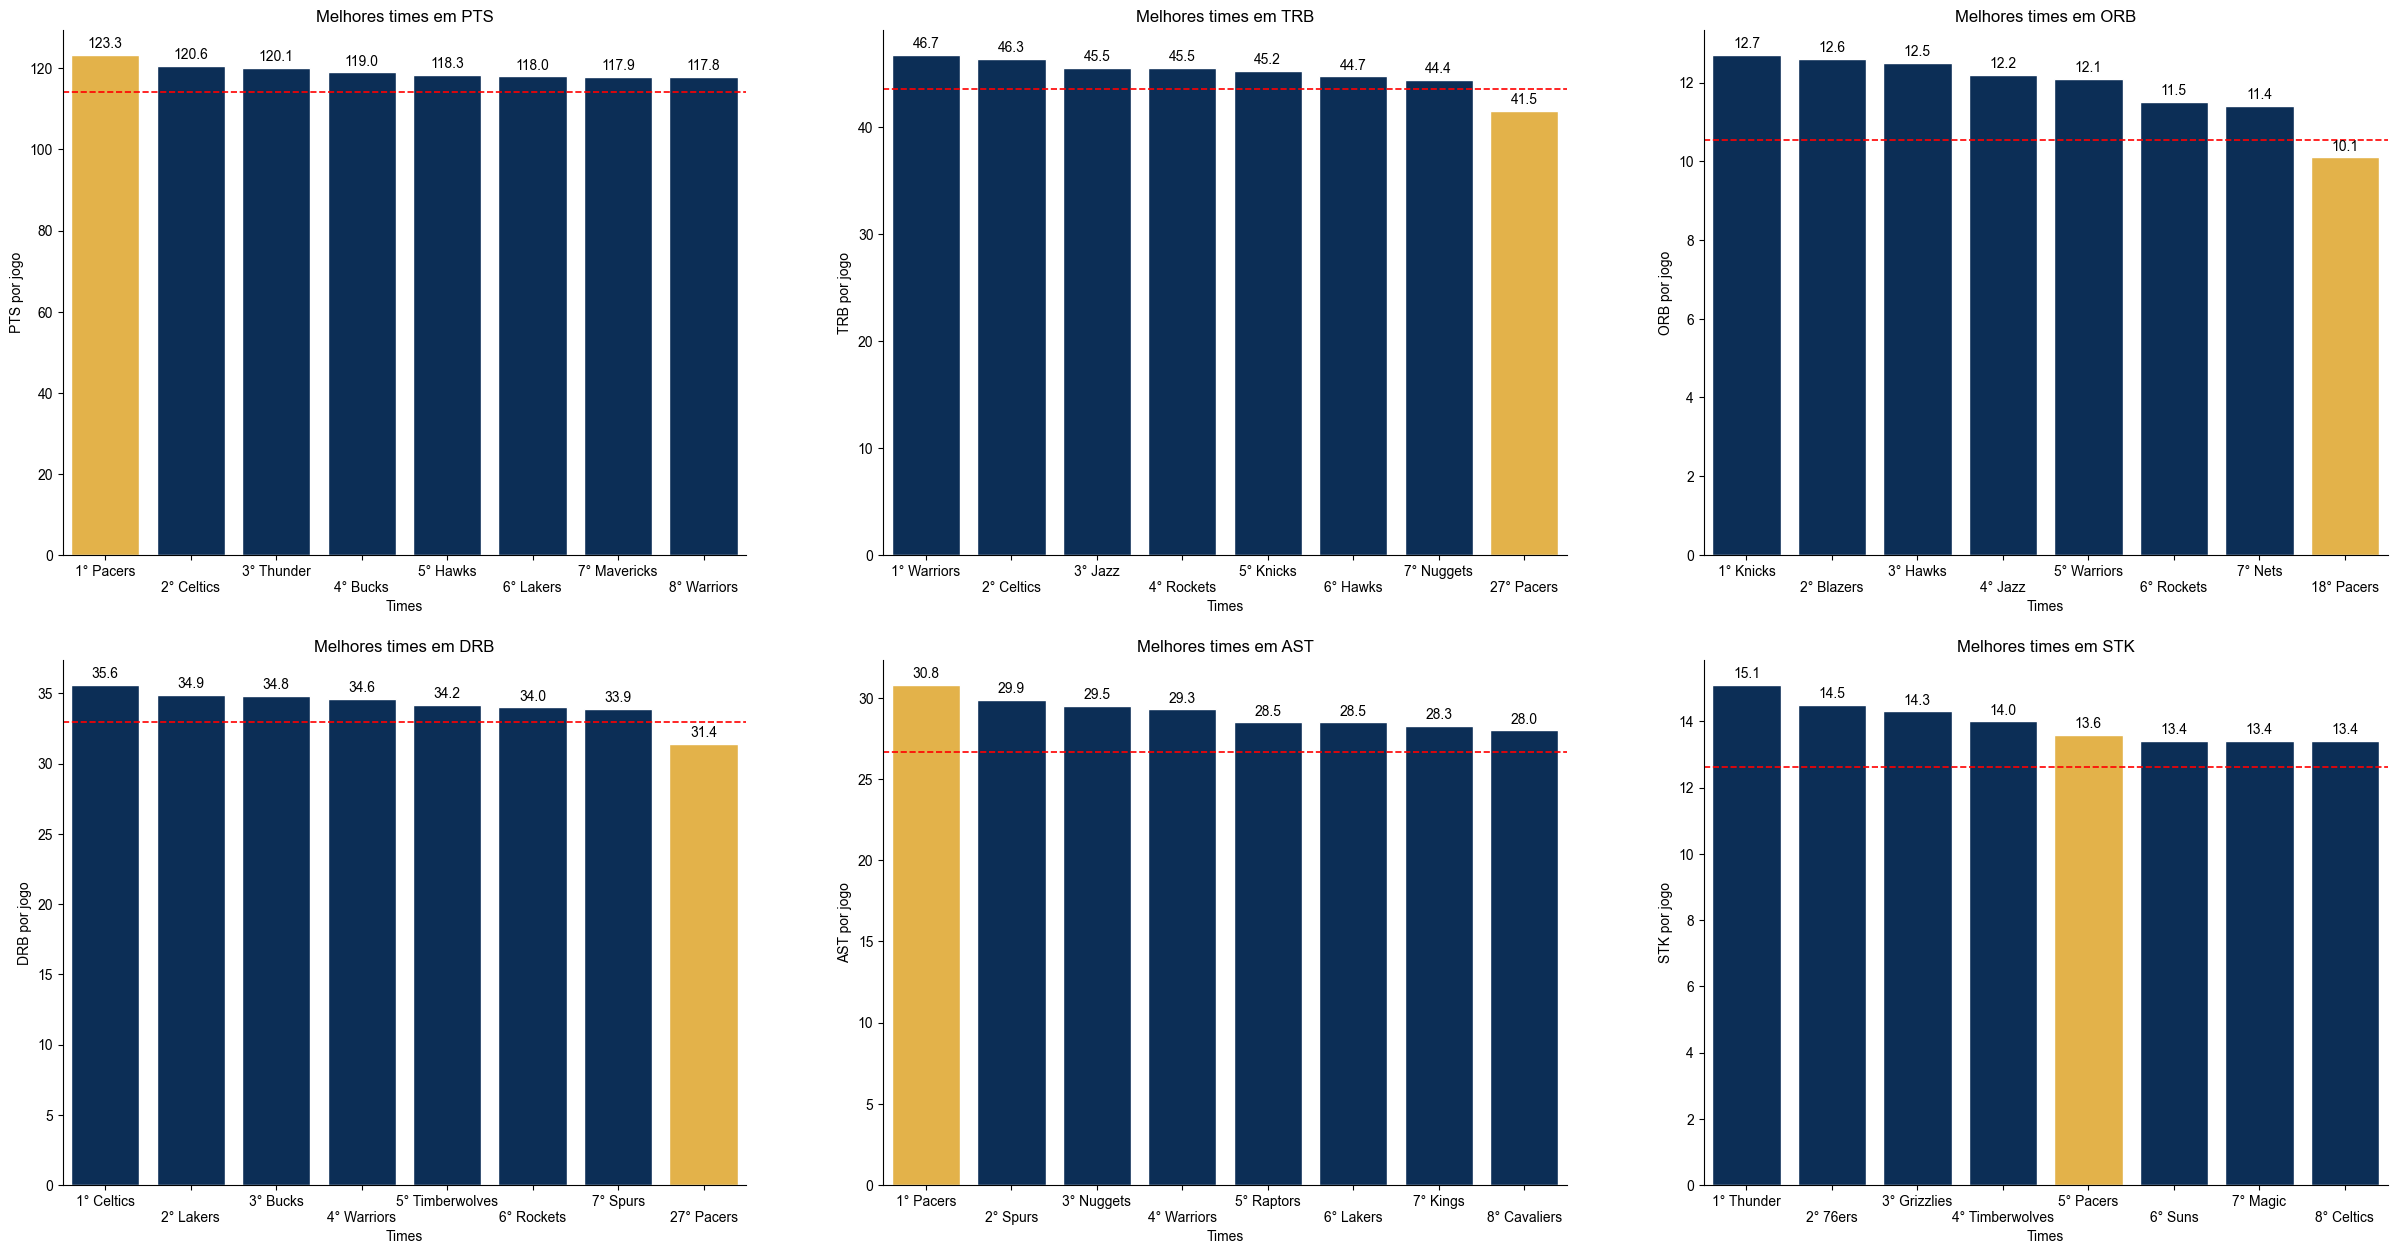

In [16]:
#Gráficos de estatísticas acumulativas do time
fig = vertical_bar_chart(df_teams, ["PTS", "TRB", "ORB", "DRB", "AST", "STK"])

De acordo com os gráficos, pode-se concluir que:
<ul>
    <li> O Indiana Pacers possui o melhor ataque em pontos por jogo da liga;</li>
    <li> Além de possuir o melhor ataque em pontos por jogo, também é o time que mais distribui assistências, demonstrando ser um sistema ofensivo baseado na troca de passes e movimentação constante;</li>
    <li> O Pacers é um bom time nas principais estatísticas defensivas coletivas, ficando em quinto lugar no ranking de Stocks; </li>
    <li> Indiana é um time mediano em rebotes ofensivos, estatística de suma importância para a manutenção da posse de bola e segundas chances de pontuação. Ao mesmo tempo, os Pacers também são um dos piores times da liga em rebotes defensivos, estando na 27ª posição no ranking e mais de 5 rebotes atrás do 1º colocado, o que gera muitas segundas chances de pontuação para os adversários e, consequentemente, transforma-se em pontos contra; </li>
    <li> O time está abaixo da média em todas as instâncias possíveis no quesito rebotes, demonstrando que esta é a principal vulnerabilidade da equipe. </li>
</ul>

Para o problema dos rebotes, pode-se formular uma hipótese como causa principal: a falta de jogadores especialistas em rebotes, principalmente nas posições de pivô e ala-pivô, as quais costumam cobrir o garrafão.

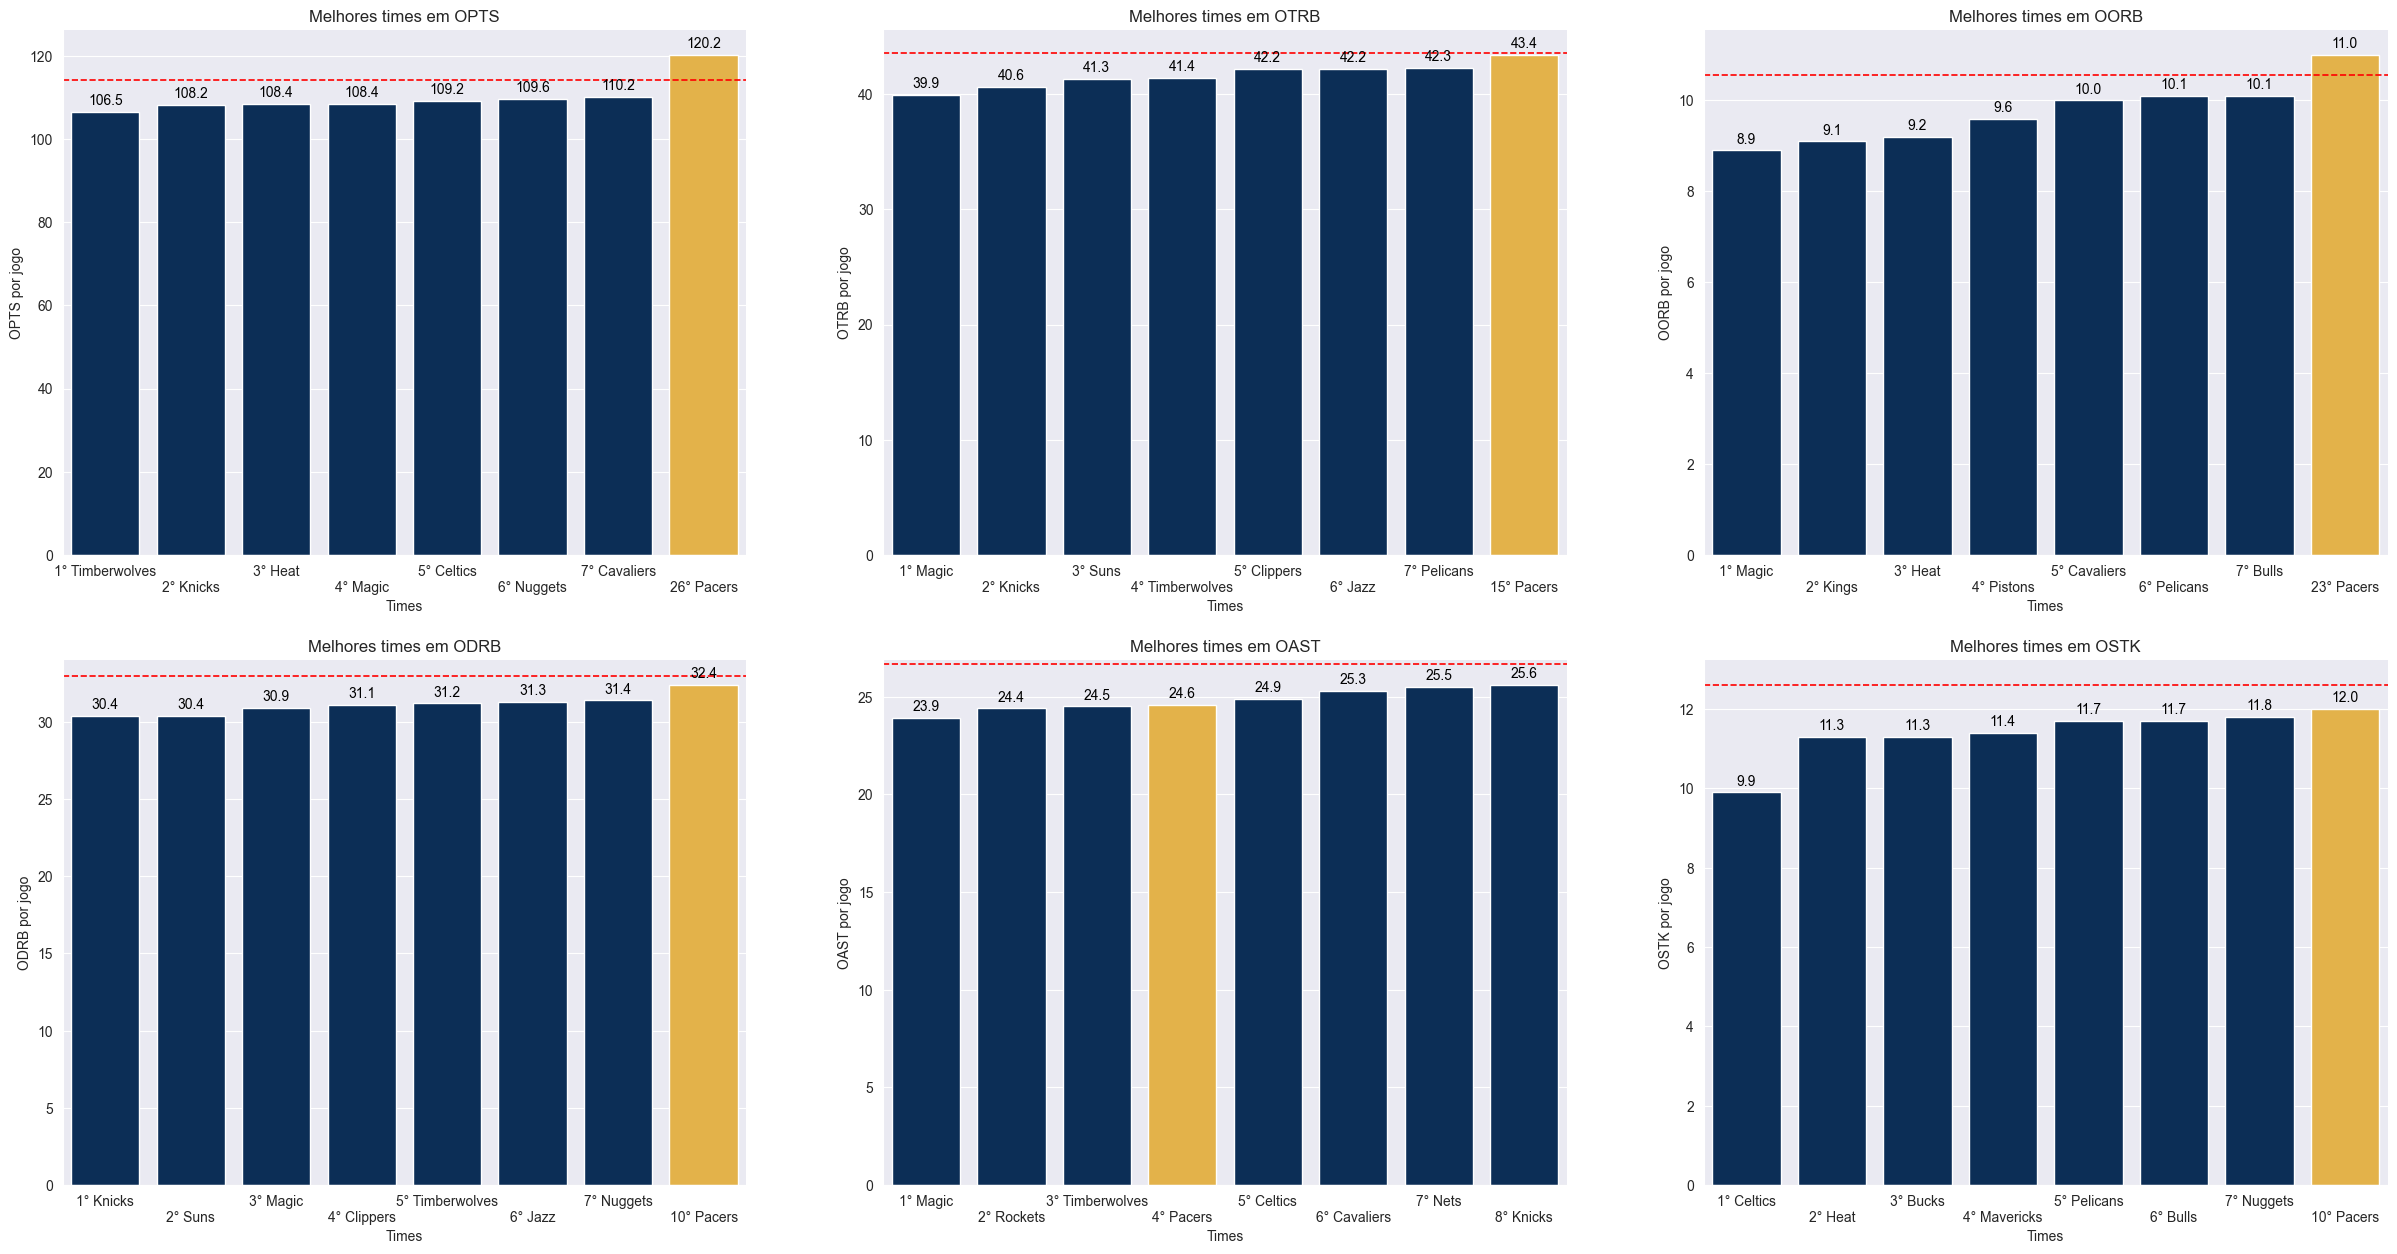

In [17]:
#Gráfico de estatísticas acumulativas dos oponentes dos times
fig = vertical_bar_chart(df_teams, ["OPTS", "OTRB", "OORB", "ODRB", "OAST", "OSTK"], True)

Os gráficos acima mostram a média das estatísticas que os times cedem aos seus adversários. No caso destes gráficos, quanto menor o número, melhor a performance defensiva. Dito isso, alguns pontos notáveis são:
<ul>
    <li> Os Pacers são uma das piores defesas em pontos cedidos por jogo (OPTS), com 120,2 — um número altíssimo que acaba ofuscando as boas médias defensivas, como as assistências cedidas por jogo (OAST) e os stocks (STK). Além disso, é um desempenho pior do que o de alguns times que tiveram campanha negativa. Este número se torna ainda mais preocupante quando comparado à média de pontos por jogo do próprio Indiana (123,3), o que representa um saldo positivo de apenas 3,1 pontos por jogo e uma diferença de 25 posições entre o ataque e a defesa;</li>
    <li> A média de rebotes ofensivos cedidos por jogo (OORB) também é um ponto negativo. Cedendo 11,0 rebotes ofensivos por jogo, os Pacers ocupam apenas a 23ª posição no fundamento. Isso é coerente com a média de rebotes defensivos (DRB) do Indiana e com a hipótese da falta de talento dos principais jogadores do time responsáveis pelo quesito. Esta estatística também está intimamente ligada ao OPTS da equipe, pois quanto mais rebotes ofensivos cedidos, mais chances os rivais têm de pontuar; </li>
    <li> A franquia tem uma boa média de rebotes defensivos cedidos por jogo, o que implica em um bom aproveitamento nos arremessos adversários.</li>
</ul>

<h3> <center> Gráficos de estatísticas percentuais

As estatísticas percentuais são estatísticas que representam uma taxa de acerto. Elas são obtidas pela divisão da quantidade de acertos de determinado fundamento pela quantidade de tentativas no mesmo fundamento, e, por fim, multiplicadas por 100. Diferentemente das estatísticas acumulativas, aqui as duas figuras terão apenas 4 gráficos. Os gráficos apresentarão as médias percentuais e as posições no ranking do Indiana e dos outros 7 melhores times no quesito. Os gráficos também terão uma linha vermelha, que representa a média percentual da liga nesse aspecto.
A primeira figura conterá os gráficos com as estatísticas:
<ul>
    <li>Porcentagem de acerto dos arremessos de quadra (FG%)</li>
    <li>Porcentagem de acerto dos arremessos de 2 pontos (2P%)</li>
    <li>Porcentagem de acerto dos arremessos de 3 pontos (3P%)</li>
    <li>Porcentagem de acerto dos lances livres (FT%)</li>
</ul>

A segunda conterá:
<ul>
    <li>Porcentagem de acerto dos arremessos de quadra dos oponentes (OFG%)</li>
    <li>Porcentagem de acerto dos arremessos de 2 pontos dos oponentes (O2P%)</li>
    <li>Porcentagem de acerto dos arremessos de 3 pontos dos oponentes (O3P%)</li>
    <li>Porcentagem de acerto dos lances livres dos oponentes (OFT%)</li>
</ul>

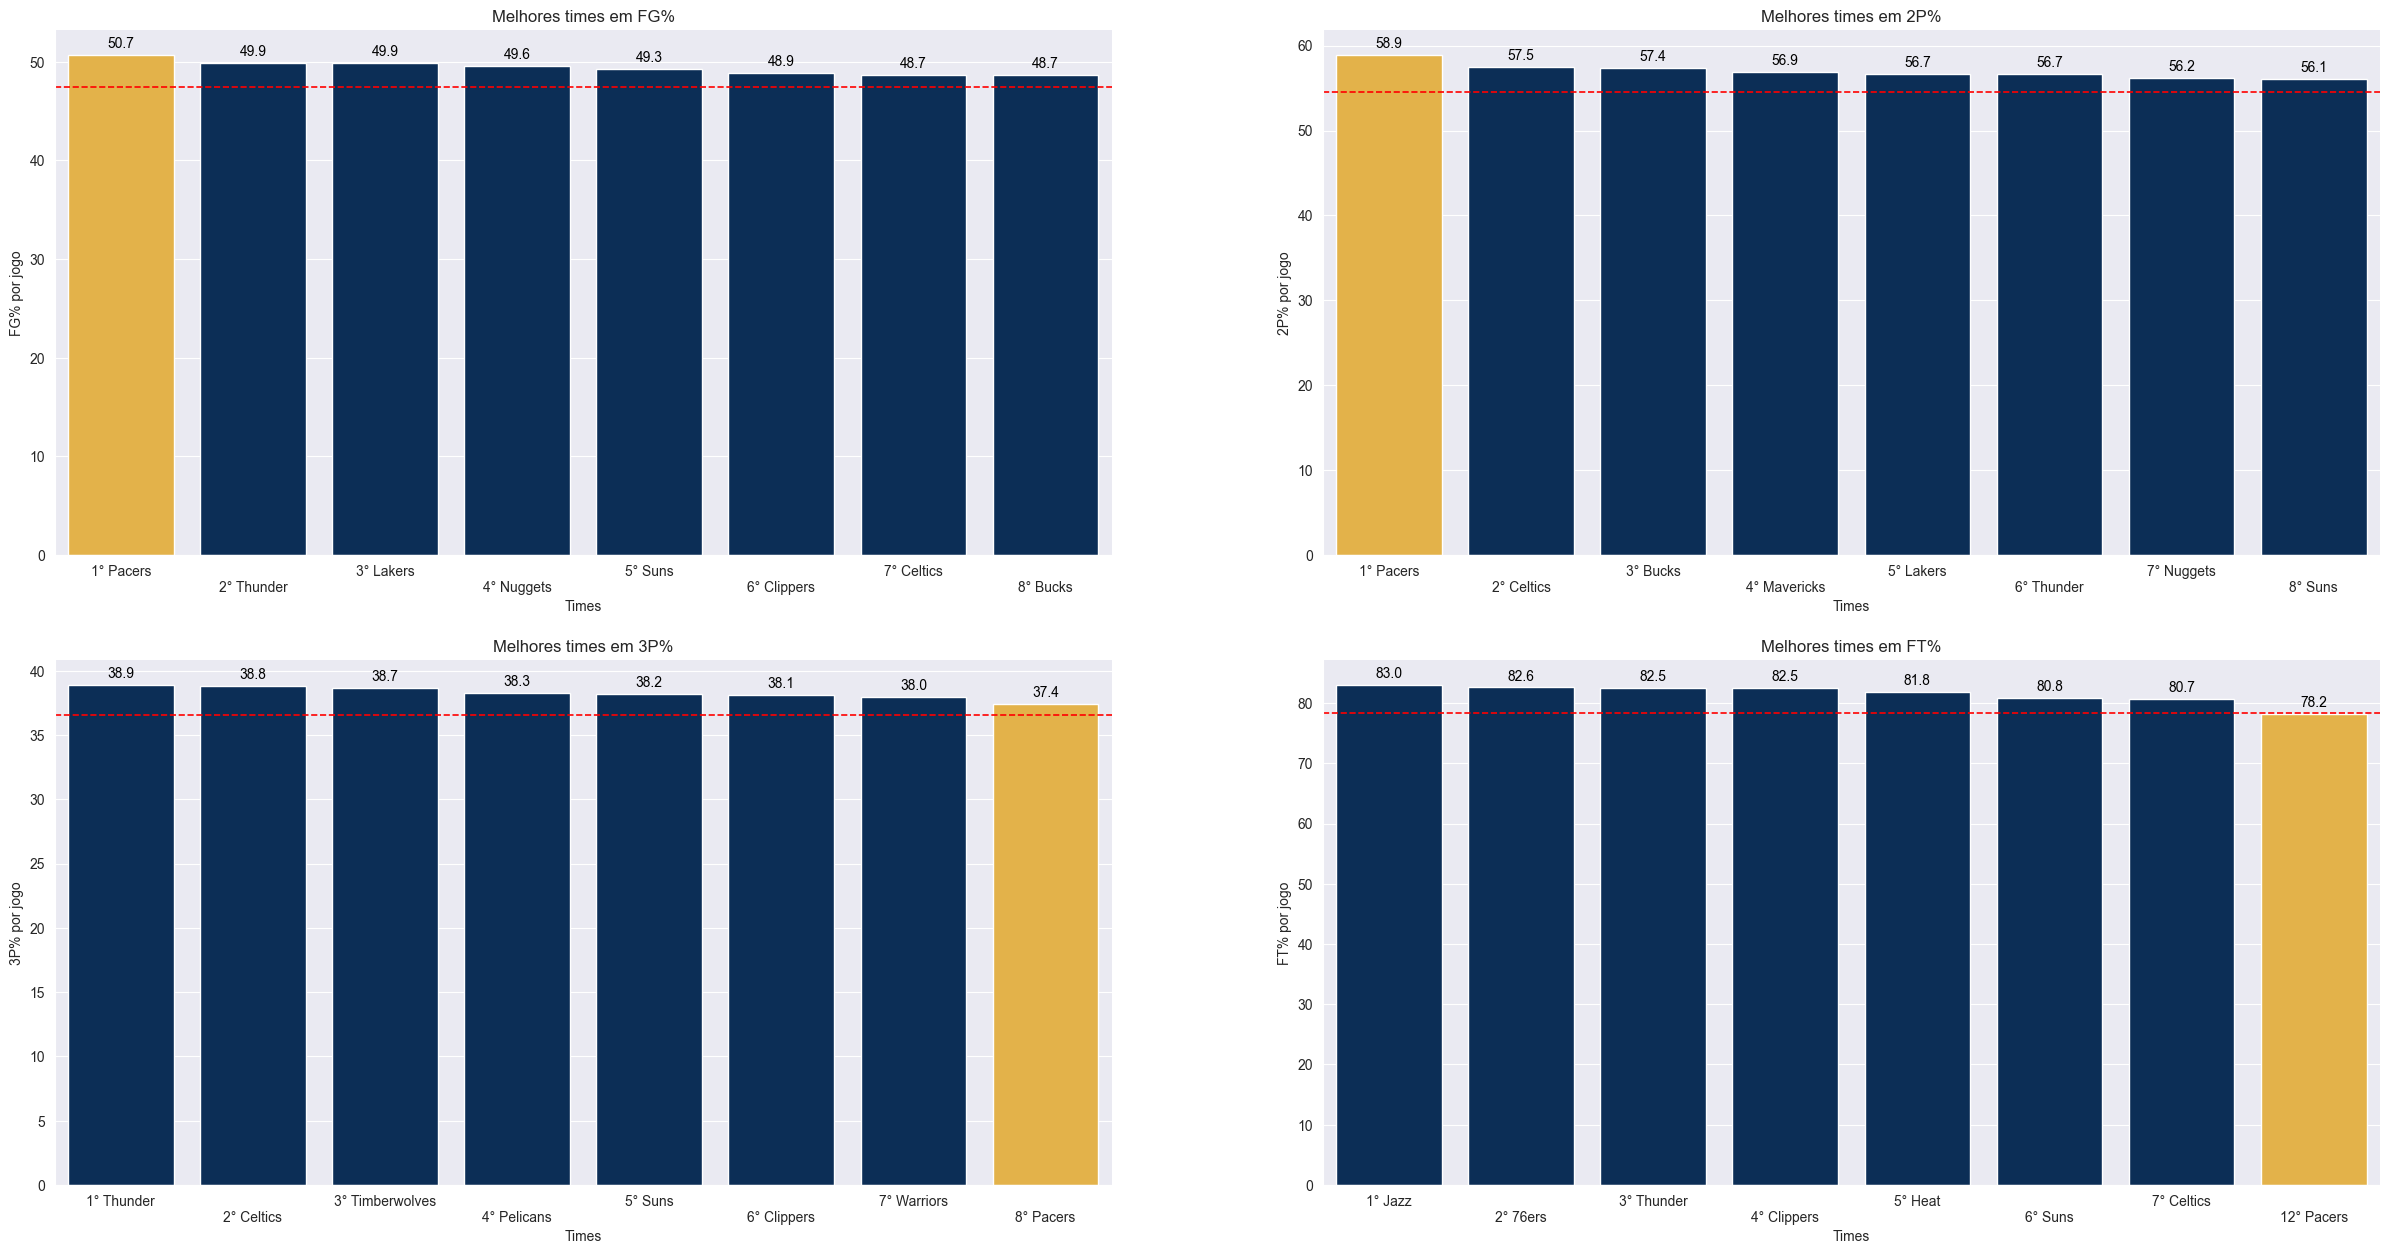

In [18]:
#Gráfico de estatísticas percentuais dos times
fig = vertical_bar_chart(df_teams, ["FG%", "2P%", "3P%", "FT%"])

Observa-se que:
<ul>
    <li> Indiana tem a melhor porcentagem de arremessos convertidos da liga (eFG%), refletindo um sistema ofensivo bem coordenado e com boa seleção de arremessos; </li>
    <li> Os Pacers também lideram a competição nos arremessos de 2 pontos, com quase 1,5% de diferença para o segundo colocado, o Boston Celtics; </li>
    <li> A taxa de acerto em arremessos de 3 pontos é acima da média, porém não dominante. Isso mostra que o time provavelmente prioriza arremessos com maior probabilidade de conversão, como bandejas e enterradas; </li>
    <li> A eficiência em arremessos livres está na média da liga. </li>
</ul>

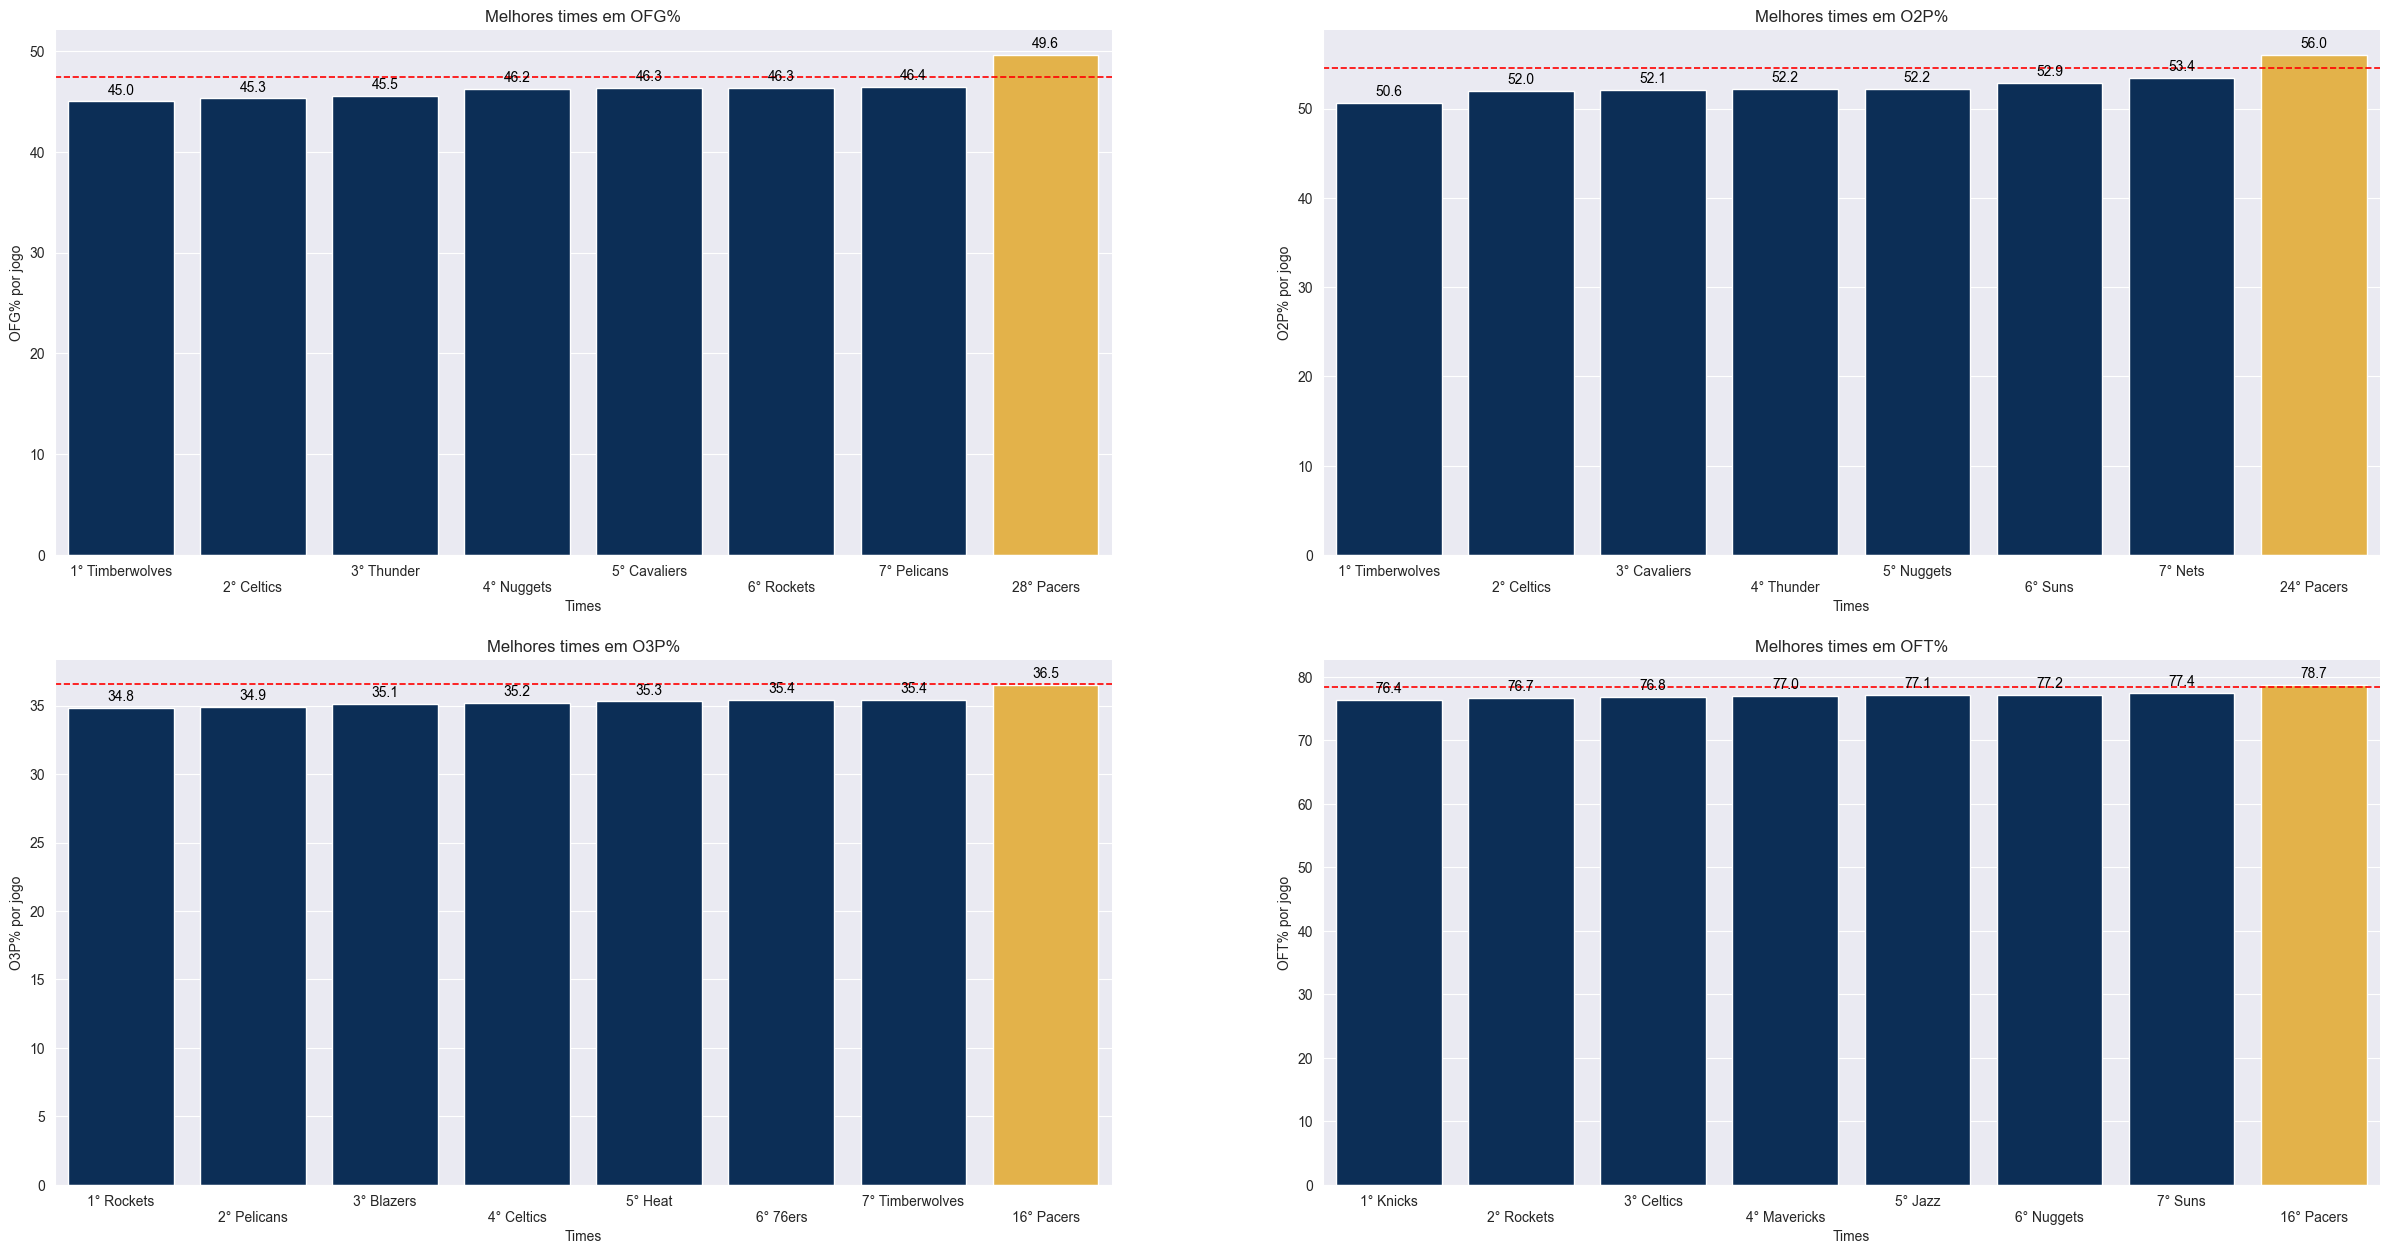

In [19]:
#Gráfico de estatísticas percentuais dos oponentes dos times
fig = vertical_bar_chart(df_teams, ["OFG%", "O2P%", "O3P%", "OFT%"], True)

Como os gráficos abordam as estatísticas dos rivais, quanto menor o percentual, melhor o desempenho. Nota-se então que:
<ol>
    <li> O Indiana Pacers é um dos times que mais cede arremessos convertidos na liga. Sua defesa contra arremessos de dois pontos é péssima, e a de três pontos, apenas mediana. O time é o terceiro que mais cede arremessos convertidos, o que explica sofrer 120,2 pontos por jogo; </li>
    <li> A defesa interior é muito frágil. Cedendo 56% dos arremessos de dois pontos, Indiana fica em 24° no ranking, permitindo muitos arremessos próximos à cesta; </li>
    <li> Os adversários acertam 36,5% dos arremessos de três pontos contra Indiana, indicando uma defesa de perímetro apenas mediana; </li>
    <li> O número de arremessos livres sofridos pode significar um time que comete muitas faltas, se em alto número. No caso dos Pacers, esse número está na média da liga. </li>
</ol>

<h2> <center> Análise Descritiva dos Dados (ADD) individuais do Indiana Pacers

Nesta parte do estudo, irei analisar os dados individuais dos jogadores do Indiana Pacers e compará-los com o resto dos jogadores da liga. Isto irá me ajudar a compreender os jogadores mais relevantes do time, suas contribuições ofensivas e defensivas, e explorar as necessidades posicionais da franquia para o futuro.

Para iniciar, começarei filtrando do df_players as estatísticas dos jogadores do Indiana Pacers e salvando-as em um novo dataframe chamado "indiana_df"

In [20]:
#Dataframe com as estatísticas dos jogadores do Indiana Pacers
indiana_df = df_players.loc[df_players["Tm"] == "IND", ["Player", "G", "GS", "MP", "Pos", "PTS", "ORB", "DRB", "TRB", "AST", "STK", "FG", "FGA", "FG%", "2PA", "2P", "2P%", "3PA", "3P", "3P%", "FT", "FTA", "FT%", "eFG%"]].sort_values(by = "GS", ascending = False)

indiana_df

,Player,G,GS,MP,Pos,PTS,ORB,DRB,TRB,AST,...,2PA,2P,2P%,3PA,3P,3P%,FT,FTA,FT%,eFG%
658,Myles Turner,77,77,27.0,C,17.1,1.5,5.5,6.9,1.3,...,7.6,4.7,61.5,4.2,1.5,35.8,3.2,4.1,77.3,58.7
266,Tyrese Haliburton,69,68,32.2,PG,20.1,0.5,3.4,3.9,10.9,...,7.4,4.4,59.5,7.8,2.8,36.4,2.8,3.3,85.5,57.0
484,Aaron Nesmith,72,47,27.7,SF,12.2,0.9,2.9,3.8,1.5,...,4.2,2.4,58.1,4.6,1.9,41.9,1.5,1.9,78.1,60.6
483,Andrew Nembhard,68,47,25.0,PG,9.2,0.5,1.5,2.1,4.1,...,5.2,2.9,56.7,2.5,0.9,35.7,0.7,0.8,80.4,55.7
600,Pascal Siakam,41,41,31.8,PF,21.3,2.1,5.7,7.8,3.7,...,13.3,7.7,58.0,2.5,1.0,38.6,3.0,4.2,69.9,57.9
99,Bruce Brown,33,33,29.7,SG,12.1,0.8,3.9,4.7,3.0,...,6.5,3.5,54.5,3.1,1.0,32.7,2.0,2.5,81.7,52.7
650,Obi Toppin,82,28,21.1,PF,10.3,1.0,2.9,3.9,1.6,...,4.0,2.8,70.6,3.1,1.2,40.3,0.9,1.2,77.0,66.1
290,Buddy Hield,52,28,25.7,SF,12.0,0.7,2.6,3.2,2.7,...,3.1,1.8,57.5,6.9,2.6,38.4,0.5,0.6,84.8,57.5
414,Bennedict Mathurin,59,19,26.1,SF,14.5,1.0,2.9,4.0,2.0,...,7.6,3.7,48.1,3.6,1.4,37.4,3.1,3.8,82.1,50.7
614,Jalen Smith,61,14,17.2,C,9.9,1.8,3.7,5.5,1.0,...,4.1,2.8,68.9,2.4,1.0,42.4,1.2,1.7,69.2,67.0


Indiana possui 22 jogadores em seu roster. Como indicado no começo do estudo, os 5 jogadores com mais jogos iniciados em quadra serão considerados os titulares. Dito isso, os titulares de Indiana e suas respectivas posições são:
<ul>
    <li>Myles Turner (Pivô (C))</li>
    <li>Tyrese Haliburton (Armador (PG))</li>
    <li>Aaron Nesmith (Ala (SF))</li>
    <li>Andrew Nembhard (Armador (PG))</li>
    <li>Pascal Siakam (Ala-pivô (PF))</li>
</ul>

Alguns jogadores que pouco entraram em quadra, seja como titulares ou reservas, embora estejam presentes nos gráficos, terão pouca relevância ou não serão mencionados, pois suas contribuições foram quase nulas.

<h3> <center> Gráfico de estatísticas cumulativas dos jogadores do Indiana Pacers

Assim como na análise coletiva, também serão feitos gráficos para estatísticas acumuladas. Nesse caso, elas são obtidas pelo somatório da estatística determinada, realizada pelo jogador em todos os jogos da temporada, dividido pelo número total de partidas (82). As estatísticas acumuladas serão mostradas em uma figura contendo 6 gráficos. Os gráficos apresentarão as médias de todos os jogadores do Indiana Pacers e também terão uma linha vermelha, que representa a média da liga nesse aspecto.
A figura conterá os gráficos com as estatísticas:
<ul>
    <li>Pontos por jogo (PPG)</li>
    <li>Rebotes totais por jogo (TRB)</li>
    <li>Rebotes ofensivos por jogo (ORB)</li>
    <li>Rebotes defensivos por jogo (DRB)</li>
    <li>Assistências por jogo (AST)</li>
    <li>Stocks por jogo (STK)</li>
</ul>

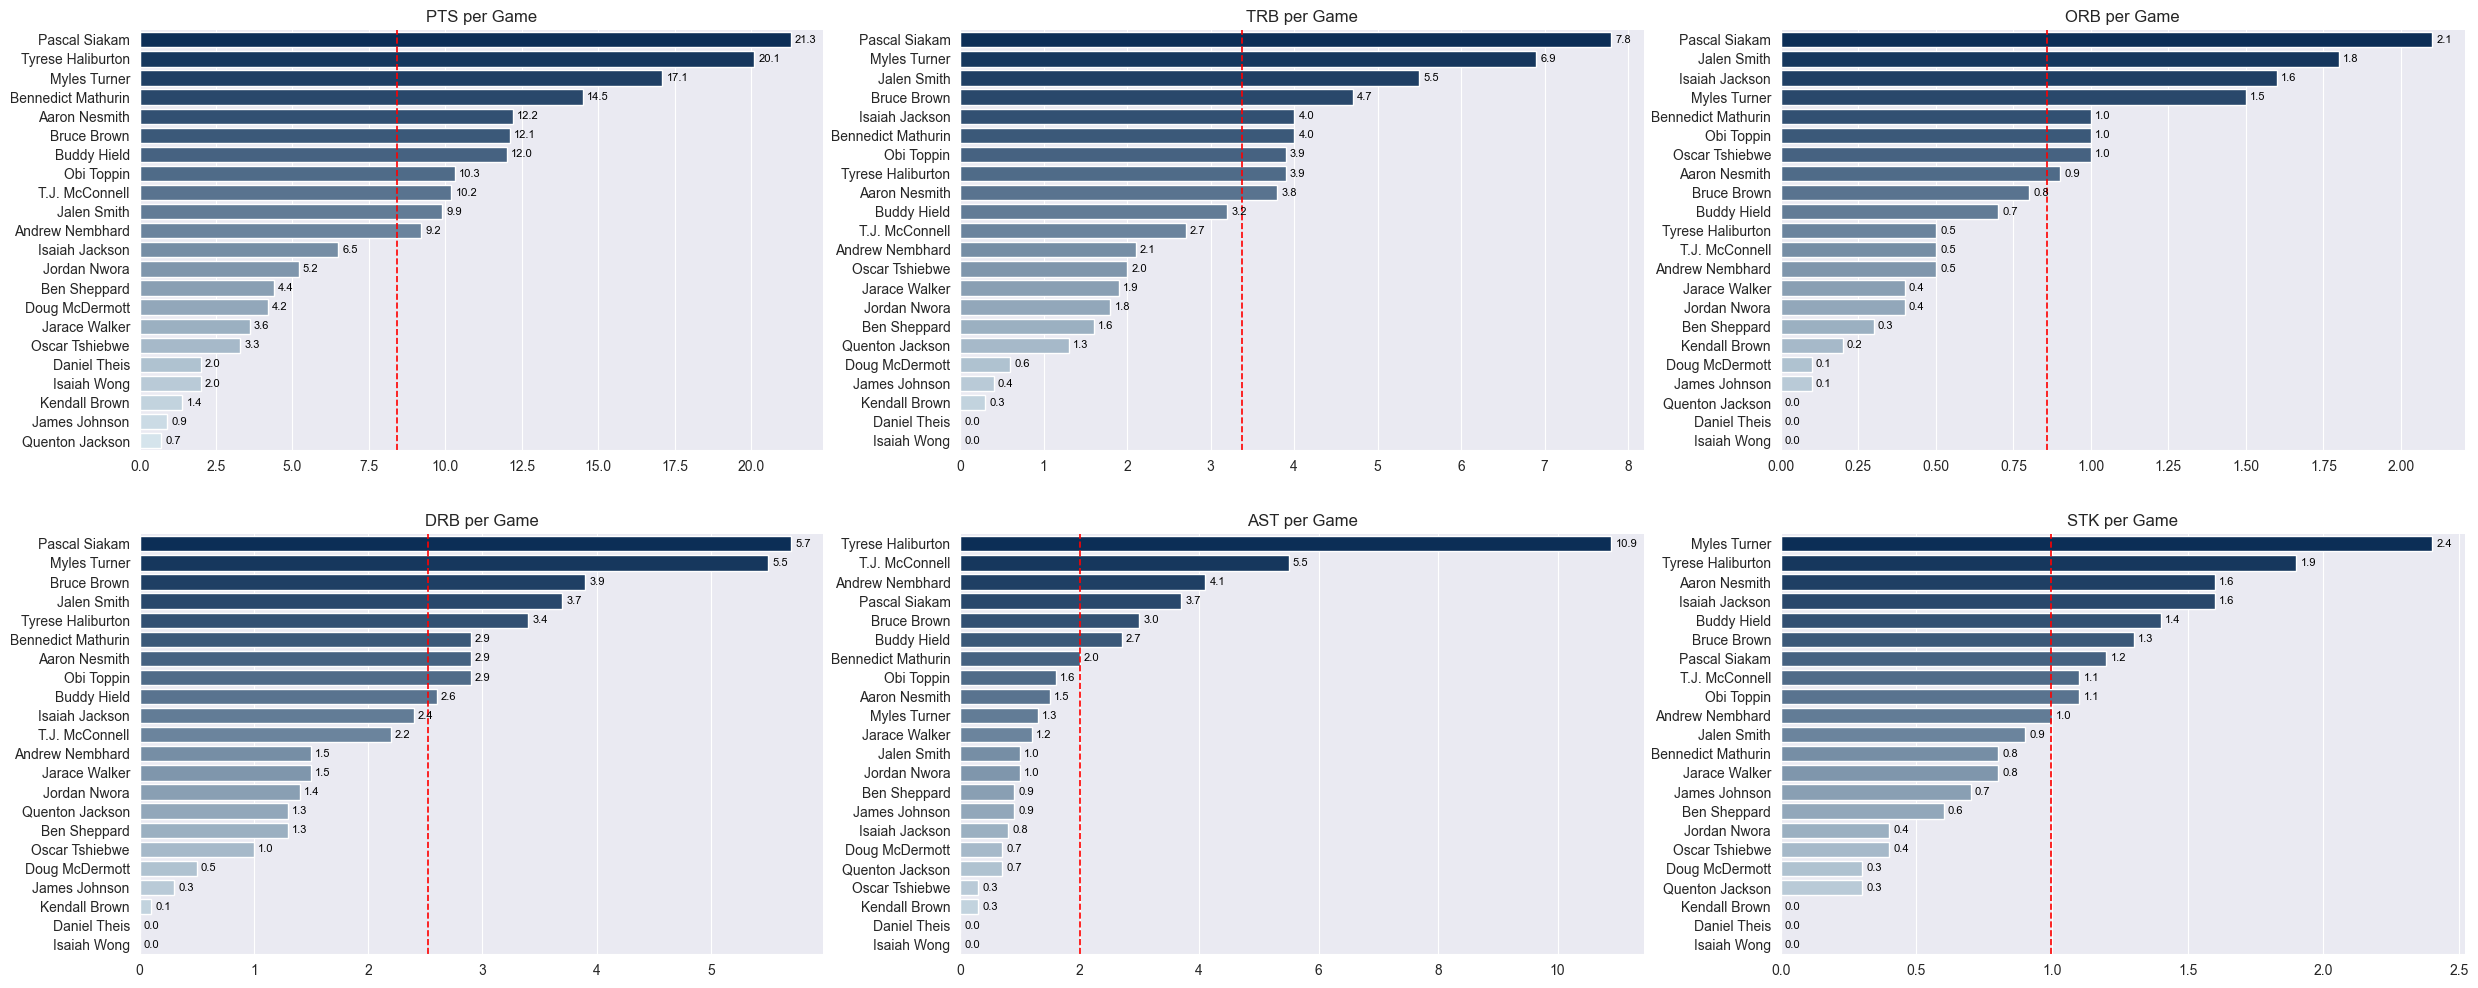

In [21]:
df_filtered = df_players[df_players["Tm"] == "TOT"].copy() #Filtra os jogadores que jogaram em mais dois times, guardando apenas a média "TOT" deles.

single_team_players = df_players[~df_players["Player"].isin(df_filtered["Player"])].copy() #Filta os jogadores que não estão no df_filtered, ou seja, os jogadores que jogaram em apenas um time.

df_filtered = pd.concat([df_filtered, single_team_players]) #Concatena os dataframes df_filtered e single_team_players, formando o dataframe com a média geral de todos os jogadores da liga.

fig = horizontal_bar_chart(indiana_df, df_filtered, ["PTS", "TRB", "ORB", "DRB", "AST", "STK"])

Dado estes 6 gráficos, nota-se alguns pontos:

<ol>
    <li> O Indiana Pacers possui uma ótima distribuição de pontos por jogador, com 9 jogadores acima de 10 pontos por jogo e 11 jogadores acima da média de pontos da liga, considerando todos os jogadores; </li>
    <li> Tyrese Haliburton é o principal responsável pelo ataque, liderando o time em assistências e sendo um dos líderes em pontos. Destaca-se também sua contribuição defensiva, com 1,9 stocks por jogo; </li>
    <li> Pascal Siakam é uma peça-chave para o time, liderando-o em pontos, rebotes ofensivos, rebotes defensivos e rebotes totais, além de estar acima da média da liga nas demais estatísticas; </li>
    <li> Embora tenha uma enorme presença ofensiva e defensiva, Myles Turner destaca-se negativamente nos rebotes, fundamento essencial para sua posição, sendo de se esperar que ele fosse o líder nesse quesito. Isso fica ainda mais acentuado nos rebotes ofensivos (ORB), em que sua média é mais baixa que a dos reservas Jalen Smith e Isaiah Jackson, o que evidencia ainda mais a lacuna de talentos em rebotes presente no time; </li>
    <li> T.J. McConnell, Obi Toppin, Buddy Hield e Bruce Brown são os jogadores mais impactantes do banco de reservas, considerando, no geral, todos os fundamentos presentes nos gráficos; </li>
    <li> Nas assistências, existe um abismo de diferença entre o líder, Haliburton, e o restante dos jogadores. A longo prazo, essa dependência excessiva de Tyrese na criação de jogadas pode ser prejudicial para o time, por fatores como marcação reforçada dos adversários sobre ele e possíveis lesões do jogador. </li>
</ol>

<h3> <center> Gráfico de participação por minuto

Para analisar o impacto que cada jogador em quadra utilizarei o gráfico de participação por minuto. Ele mostra quantos pontos, assistências, rebotes ou stocks, um jogador faz por minuto em quadra.

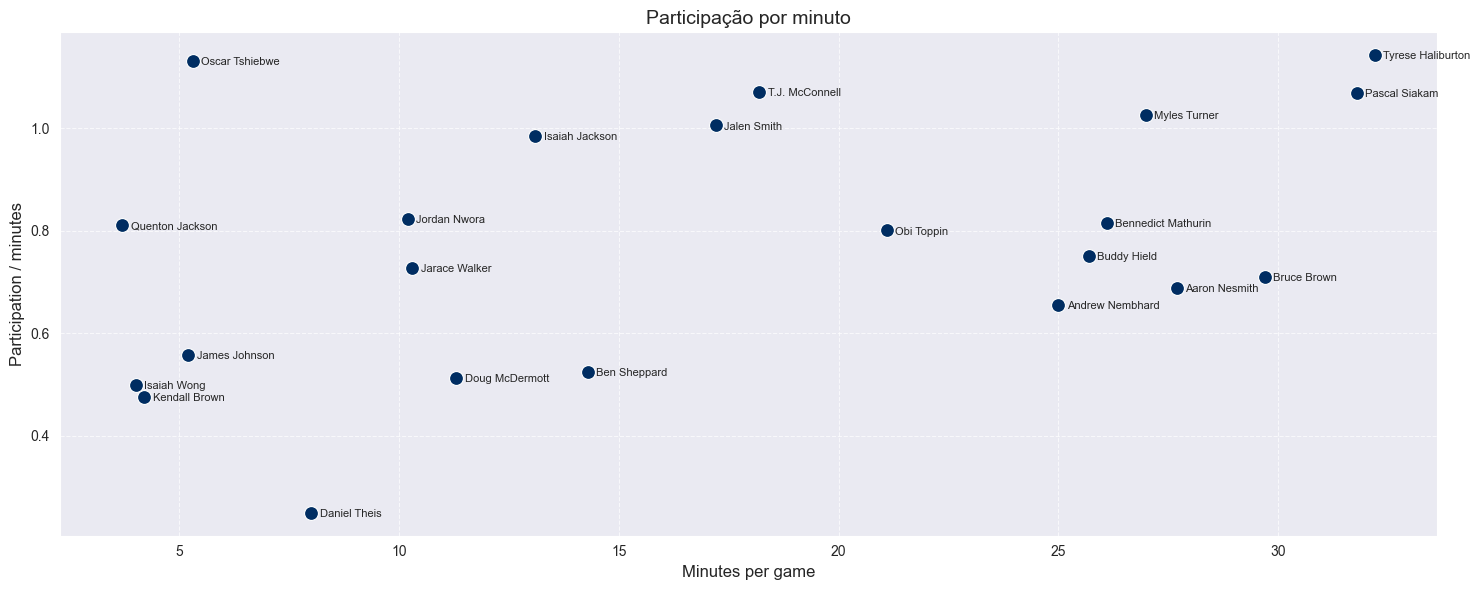

In [22]:
indiana_df["Participation per Minute"] = (indiana_df["PTS"] + indiana_df["TRB"] + indiana_df["AST"] + indiana_df["STK"]) / indiana_df["MP"]

fig = scatter(indiana_df, ["MP", "Participation per Minute"], "Participação por minuto", "Minutes per game", "Participation / minutes")

<p>
    Por este gráfico, pode-se perceber ainda mais o impacto que Tyrese Haliburton e Pascal Siakam têm em quadra, registrando mais de uma participação por minuto e jogando mais de 30 minutos por partida, cada um. Embora tenha problemas com rebotes, Myles Turner também é peça fundamental e extremamente participativo quando está em quadra. Destacam-se, mais uma vez, os jogadores reservas, que mantêm um bom nível de participação, o que ajuda a preservar o ritmo do time durante o jogo.
</p>

<h3> <center> Gráficos de volume e eficiência de arremessos

Os gráficos de volume e eficiência de arremesso correlacionam a quantidade de arremessos específicos tentados por jogo por um determinado jogador com a quantidade de acertos desse tipo de arremesso. Eles permitem identificar quais jogadores são mais eficientes ofensivamente e quais são mais responsáveis pelo ataque. Para isso, podem ser visualizados 3 gráficos abaixo:
<ul>
    <li> Arremessos de quadra de 2 pontos </li>
    <li> Arremessos de quadra de 3 pontos </li>
    <li> Arremessos de quadra (soma dos arremessos de 2 e 3 pontos) </li>
</ul>

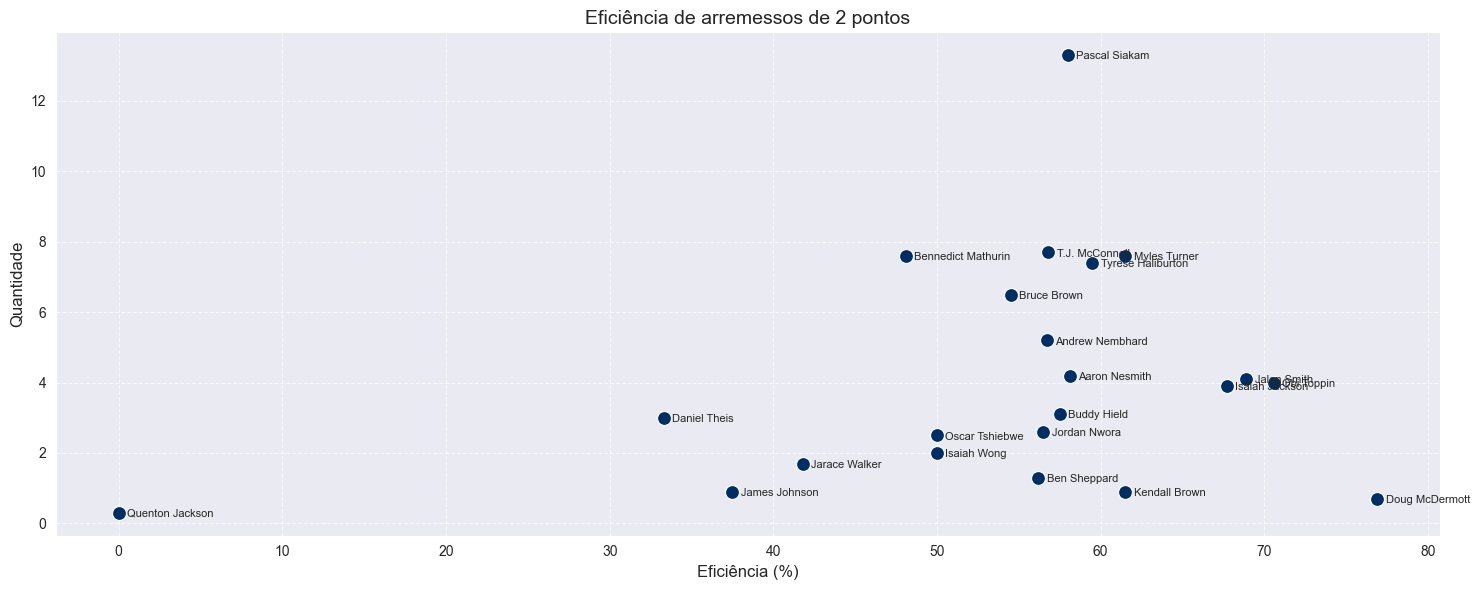

In [23]:
fig = scatter(indiana_df, ["2P%", "2PA"], "Eficiência de arremessos de 2 pontos", "Eficiência (%)", "Quantidade")

<p>
No gráfico referente aos arremessos de 2 pontos, nota-se um amplo domínio de Pascal Siakam, o qual combina uma ótima eficiência (57,99%) e alto volume (em torno de 13 arremessos por jogo), destacando seu papel de finalizador de jogadas, principalmente próximas à cesta. Entretanto, também se destaca que há uma diferença colossal entre o volume que Siakam possui em arremessos de 2 pontos e o restante do time, com uma diferença de mais de 70% em relação ao segundo jogador que mais tenta, T.J. McConnell. Outros jogadores com minutagem relevante, como Haliburton, Toppin, Mathurin, Turner e o próprio McConnell, aparecem com um volume relativamente baixo, mesmo apresentando boa eficiência.
</p>

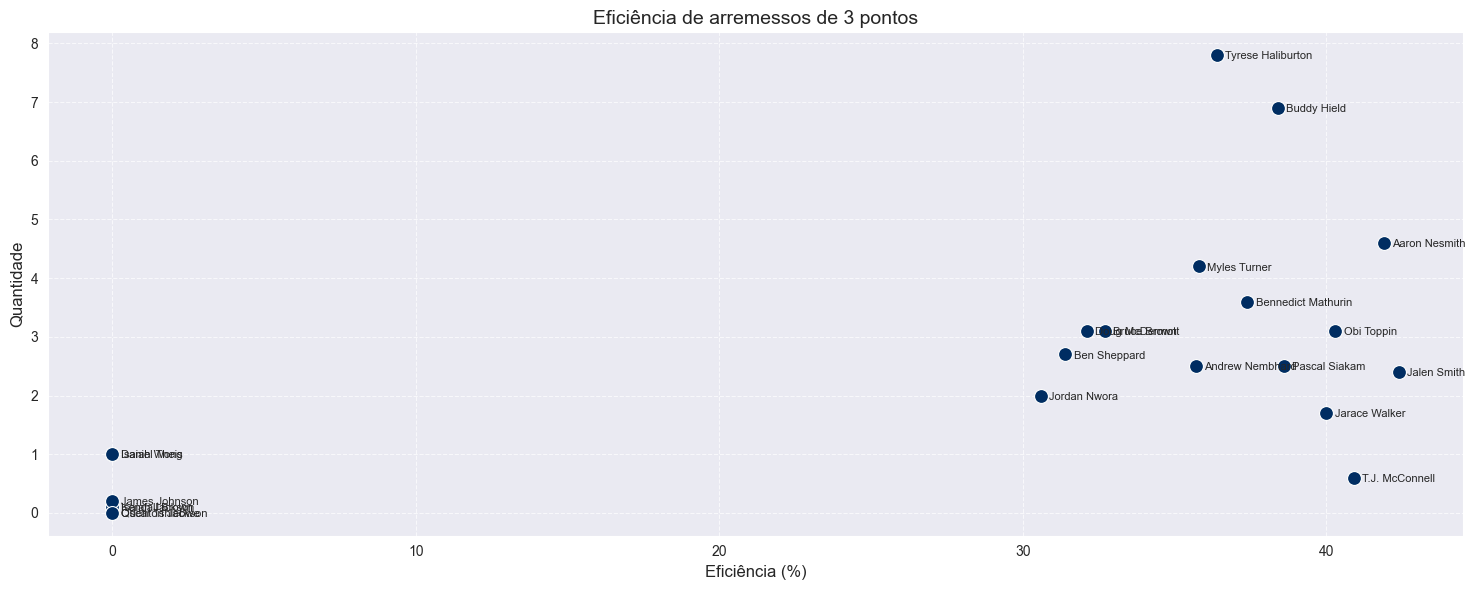

In [24]:
fig = scatter(indiana_df, ["3P%", "3PA"], "Eficiência de arremessos de 3 pontos", "Eficiência (%)", "Quantidade")


<p>
    No perímetro, também há uma grande diferença entre o volume dos dois jogadores que mais tentam (Haliburton e Hield) para o resto do time. No quesito, Tyrese Haliburton e Buddy Hield são os destaques principais, aliando um alto volume (quase 8 arremessos por jogo) com uma alta eficiência (próxima de 39%). Myles Turner também aparece com certo destaque, com números de tentativas e eficiência altíssimos para um pivô. Uma grata surpresa que o gráfico mostra é o Aaron Nesmith. Ele é o segundo jogador que mais converte bolas triplas, com mais de 42% de eficiência, um número muito alto para a NBA, mostrando que ele pode se tornar uma sniper confiável no elenco. Além disso, também se observa que o arremesso de 3 pontos é a principal fraqueza do jogo do armador T.J. McConnell. Mesmo sendo um armador, ele raramente tenta esse tipo de arremesso nos jogos, apesar de ter um bom desempenho quando o faz.
</p>

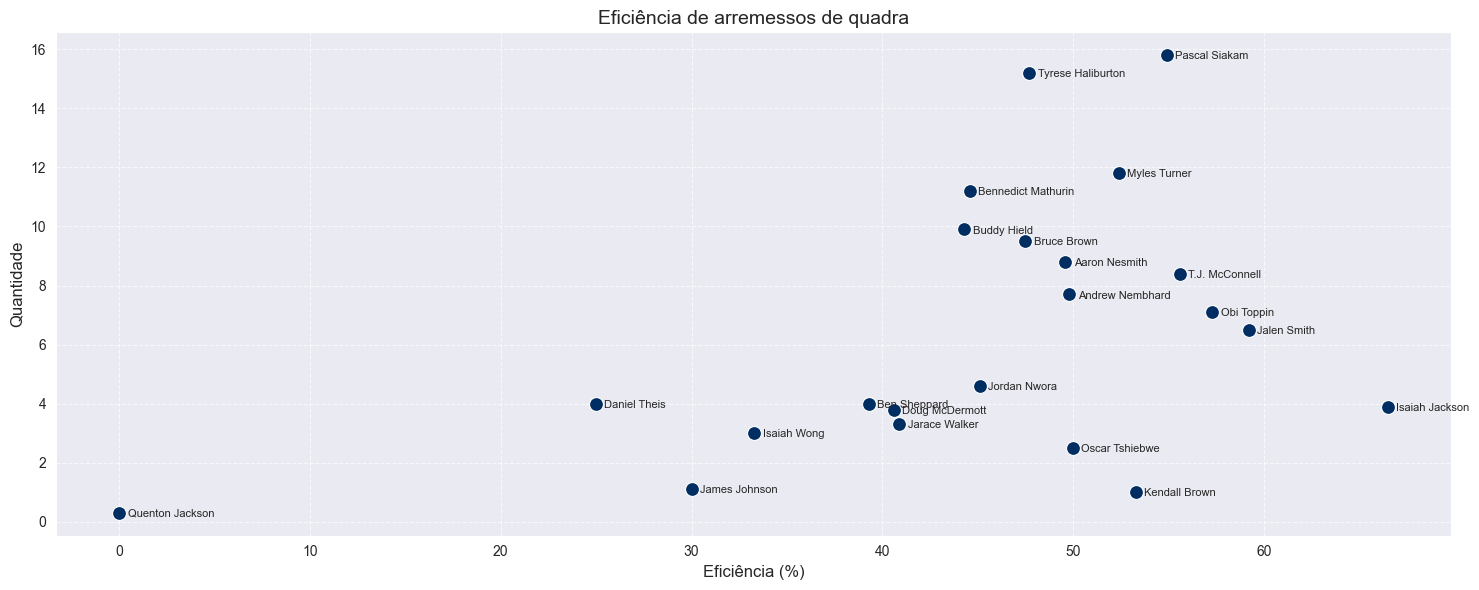

In [25]:
fig = scatter(indiana_df, ["FG%", "FGA"], "Eficiência de arremessos de quadra", "Eficiência (%)", "Quantidade")

<p>
    O gráfico de eficiência geral mostra uma visão ainda mais holística da contribuição ofensiva de cada jogador. Pascal Siakam lidera mais uma vez, sendo o jogador com maior volume e eficiência, ressaltando ainda mais seu papel de protagonista ofensivo. Tyrese Haliburton vem logo atrás, com volume e eficiência parecidos, porém com o diferencial de ser uma arma também no perímetro. Salienta-se também o impacto de alguns jogadores reservas — principalmente T.J. McConnell, Obi Toppin, Bruce Brown, Jalen Smith, Bennedict Mathurin e Buddy Hield — os quais também aliam bom volume e boa eficiência. 
</p>
<p>
    Negativamente, destaca-se o novato Ben Sheppard. O atleta, que entra constantemente nos jogos da equipe, não possui boa eficiência (menos de 40%), mesmo tendo um volume de arremessos relevante para a segunda unidade, sendo este um ponto a ser melhorado em seu jogo.
</p>

<h3> <center> Comparação entre o quinteto titular do Indiana com o resto dos titulares da NBA 

Agora, irei comparar as médias dos titulares do Indiana Pacers com o resto dos titulares da liga em suas respectivas posições. Para isto, primeiramente extrairei a média dos titulares de cada franquia da NBA e salvarei em um dataframe.

In [26]:
set_teams = set(team for team in df_players["Tm"] if team != "TOT") #Set com a sigla de todos os times da liga, exceto "TOT"

df_starters = pd.DataFrame() #Dataframe onde os dados serão guardados

for team in set_teams:
    df_leaders_players = df_players.loc[df_players["Tm"] == team, ["Player", "Pos", "Tm", "G", "GS", "MP", "PTS", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "STK", "FG%", "2P%", "3P%", "eFG%", "FT%"]].sort_values(by = "GS", ascending = False) #Procura no df_players os jogadores que pertencem ao "team" e salva-os, ordenando-os por jogos iniciados

    df_starters = pd.concat([df_starters, df_leaders_players.head(5)]) #Concatena no df_starters apenas os 5 primeiros jogadores de df_leaders_players

Com todos os jogadores titulares no dataframe, usarei a função "media" para obter listas com a média estatística de cada posição do jogo entre os titulares e também as médias dos jogadores titulares dos Pacers.

In [27]:
#Médias por posição baseadas nos titulares (5 jogadores com mais GS de cada time) da liga
mean_stats_by_pos = {
    pos: df_starters.loc[df_starters["Pos"] == pos, ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"]].mean().tolist()
    for pos in ["PG", "SG", "SF", "PF", "C"]
}

#Média dos jogadores dos Pacers
player_stats = {
    player: indiana_df.loc[indiana_df["Player"] == player, ["PTS", "AST", "TRB", "STK", "FG%", "eFG%", "2P%", "3P%", "FT%"]].mean().tolist()
    for player in ["Tyrese Haliburton", "Pascal Siakam", "Myles Turner", "Aaron Nesmith", "Andrew Nembhard"]
}

Agora que as estatísiticas já estão salvas, os gráficos serão plotados. As estatísticas abaixo serão plotadas em uma figura com dois gráficos de radar para cada jogador. Um gráfico será de estatísticas acumulativas e o outro de estatísticas percentuais.

In [28]:
subjects_1 = ["PTS", "AST", "TRB", "STK"] #Estatísticas usadas no 1° gráfico
subjects_2 = ["FG%", "eFG%", "2P%", "3P%", "FT%"] #Estatísticas usadas no 2° gráfico

<h3> <center> Tyrese Haliburton vs armadores

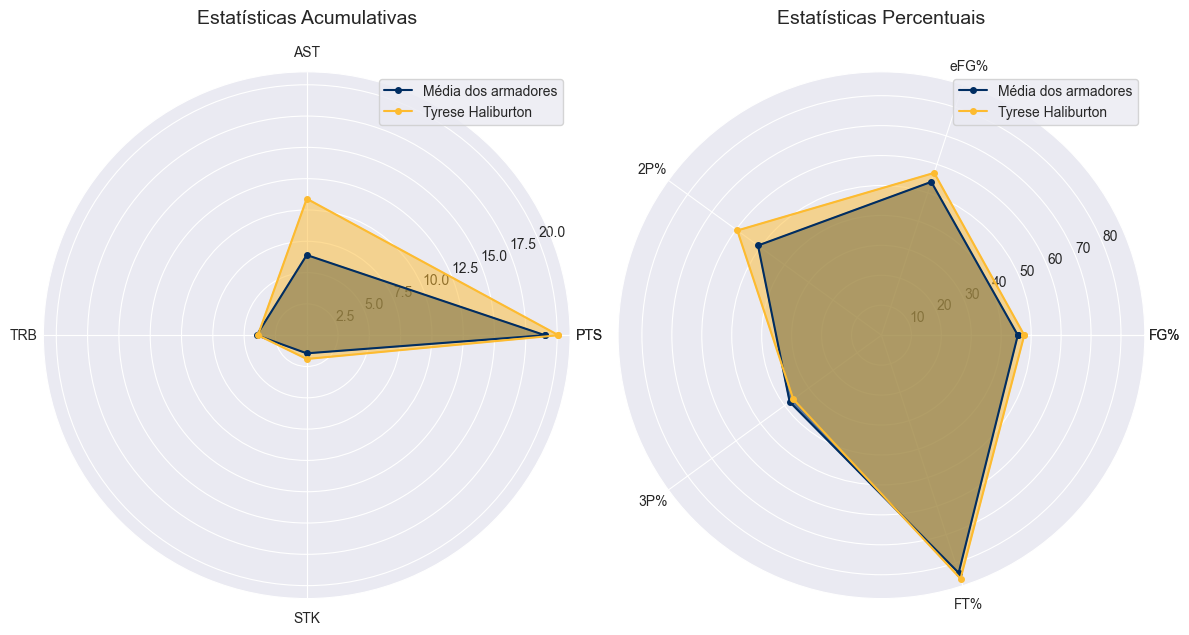

In [29]:
fig = plot_radar_charts(
    subjects_1, subjects_2,
    mean_stats_by_pos["PG"][:4], mean_stats_by_pos["PG"][4:], 
    player_stats["Tyrese Haliburton"][:4], player_stats["Tyrese Haliburton"][4:], 
    "Média dos armadores", "Tyrese Haliburton", 
)

Tyrese Haliburton possui um desempenho em assistências muito acima da média dos titulares da liga, aliando isso a uma quantidade de pontos também muito alta, levemente abaixo da média da sua posição. Seu percentual de arremessos convertidos também é bastante alto, estando acima da média em quase todos os fundamentos, exceto em bolas de 3 pontos — embora, mesmo neste quesito, ainda possua uma média excelente. Sua capacidade de gerar pontos, direta ou indiretamente, em conjunto com sua eficiência, o torna uma ameaça contínua para as defesas adversárias, fazendo dele um dos melhores jogadores em sua posição.
</p>

<h3> <center> Andrew Nembhard vs armadores

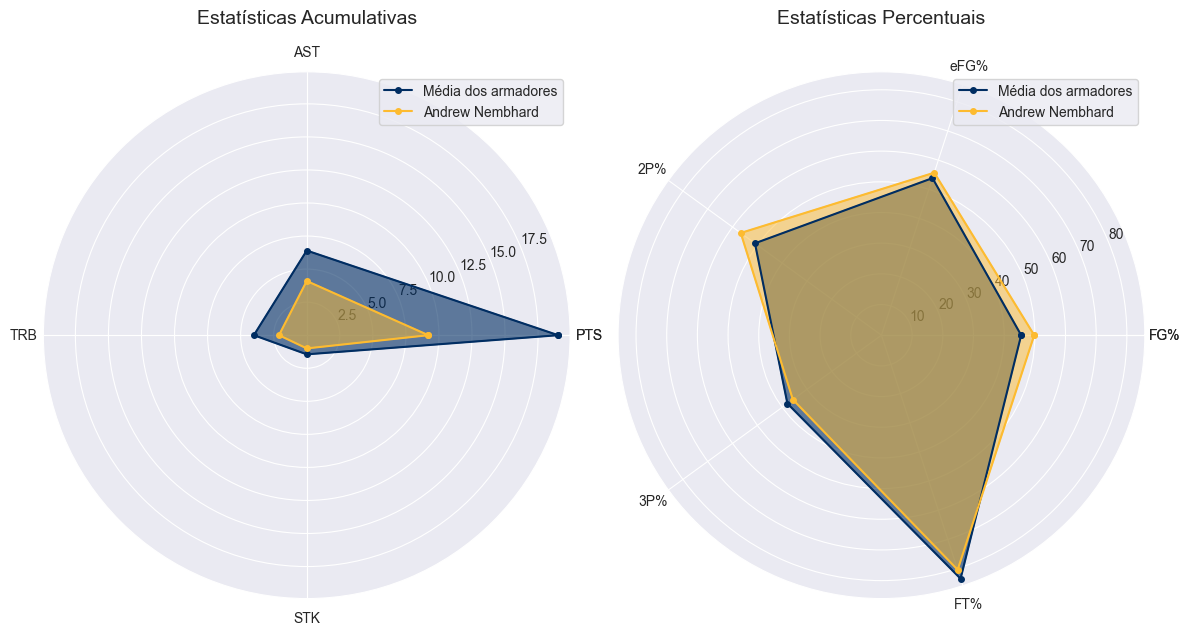

In [30]:
fig = plot_radar_charts(
    subjects_1, subjects_2,
    mean_stats_by_pos["PG"][:4], mean_stats_by_pos["PG"][4:], 
    player_stats["Andrew Nembhard"][:4], player_stats["Andrew Nembhard"][4:], 
    "Média dos armadores", "Andrew Nembhard", 
)

Como dito anteriormente, Andrew Nembhard possui um baixo volume de arremessos tentados por jogo, insight que é refletido na sua baixa pontuação. Porém ele possui as taxas de conversão de arremessos (FG%), conversão de arremessos de 2 pontos (2P%) e a de eficiência de arremessos (eFG%) altíssimas, além de uma bola de 3 confiável. Suas médias nos fundamentos básicos são todas abaixo do padrão NBA. Tais constatações refletem que o jogador é a última opção ofensiva do quinteto titular e provavelmente um especialista em defesa de jogadores adversários. Com isto em mente, é natural que ele possua médias abaixo da linha da NBA e que são até decentes para seu estilo de jogo, porém um aumento na sua contribuição on-ball pode ser útil para aliviar a pressão de criação de jogadas do Tyrese Haliburton e diversificar o playmaking do time. Um aumento gradual no seu volume de arremessos também seria de boa ajuda no ataque, pois como destacado suas médias de conversão de arremessos são altíssimas.

<h4> <center> Myles Turner vs pivôs

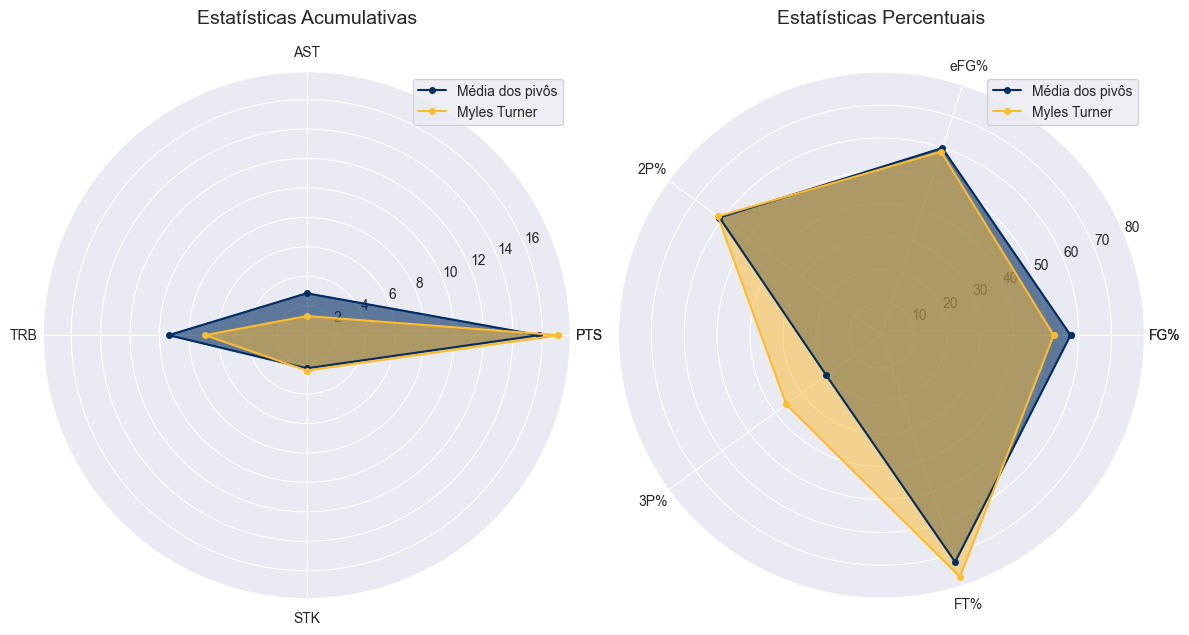

In [31]:
fig = plot_radar_charts(
    subjects_1, subjects_2,
    mean_stats_by_pos["C"][:4], mean_stats_by_pos["C"][4:], 
    player_stats["Myles Turner"][:4], player_stats["Myles Turner"][4:], 
    "Média dos pivôs", "Myles Turner", 
)

Diferentemente dos pivôs tradicionais, Myles Turner tem o arremesso de 3 pontos como seu principal diferencial. Sua taxa de conversão de arremessos de 3 pontos é fora do normal para um jogador da posição, ajudando no espaçamento de quadra do time e na infiltração dos armadores no garrafão, contribuindo para a explosividade do ataque dos Pacers. Seu arremesso de 2 pontos e arremesso livre também são altamente eficazes, e mesmo abaixo da média, seu FG% é decente, pois ele tenta muito mais arremessos de 3 pontos que os outros jogadores da sua posição. Seu desempenho em pontos por jogo e stocks por jogo também são excelentes e embora seu desempenho em assistências seja abaixo da média dos pivôs, é decente para o time, pois seu aspecto principal é ser um finalizador de jogadas. O desempenho em rebotes é seu único ponto negativo, porém melhorando nesse quesito, ele tem pleno potencial para ser um jogador elite entre os pivôs.

<h4> <center> Pascal Siakam vs alas-pivôs

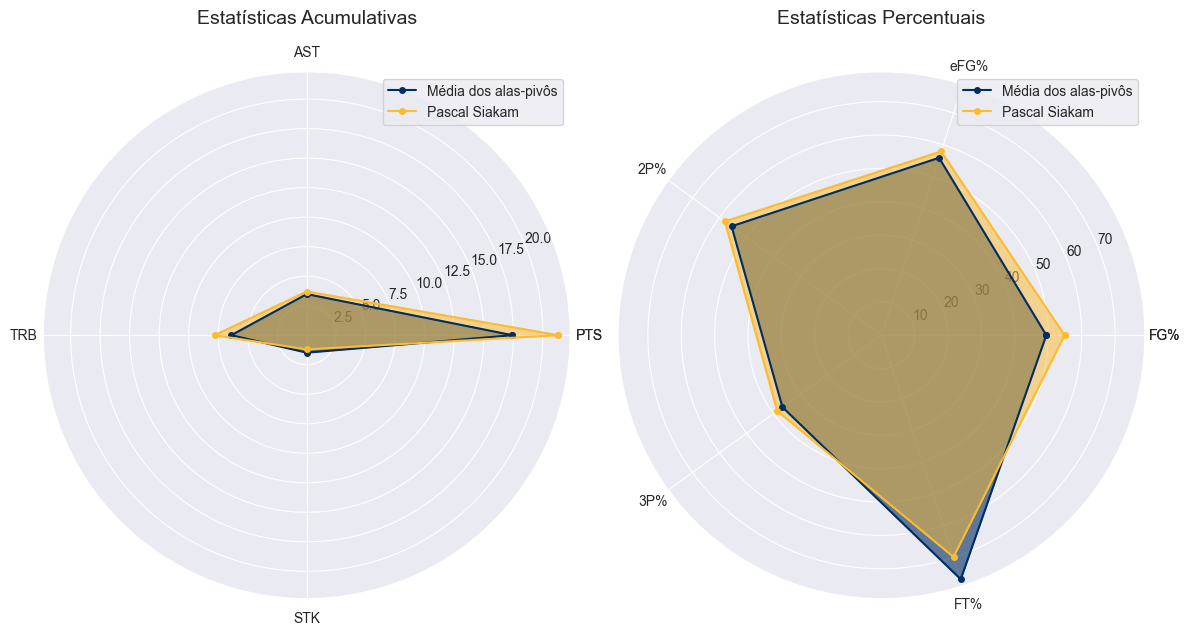

In [32]:
fig = plot_radar_charts(
    subjects_1, subjects_2,
    mean_stats_by_pos["PF"][:4], mean_stats_by_pos["PF"][4:], 
    player_stats["Pascal Siakam"][:4], player_stats["Pascal Siakam"][4:], 
    "Média dos alas-pivôs", "Pascal Siakam", 
)

Pascal Siakam foi um jogador adquirido no meio da temporado e se mostrou extremamente consistente em todos os aspectos do seu jogo, deixando um pouco a desejar somente em lances livres e arremessos de 3, o que não interfere tanto em seu estilo de jogo. A única coisa a se falar sobre ele, é que suas métricas demonstram que ele não é só um dos melhores jogadores dos Pacers, mas sim um dos melhores e mais eficientes jogadores em atividade na sua posição.

<h4> <center> Aaron Nesmith vs alas

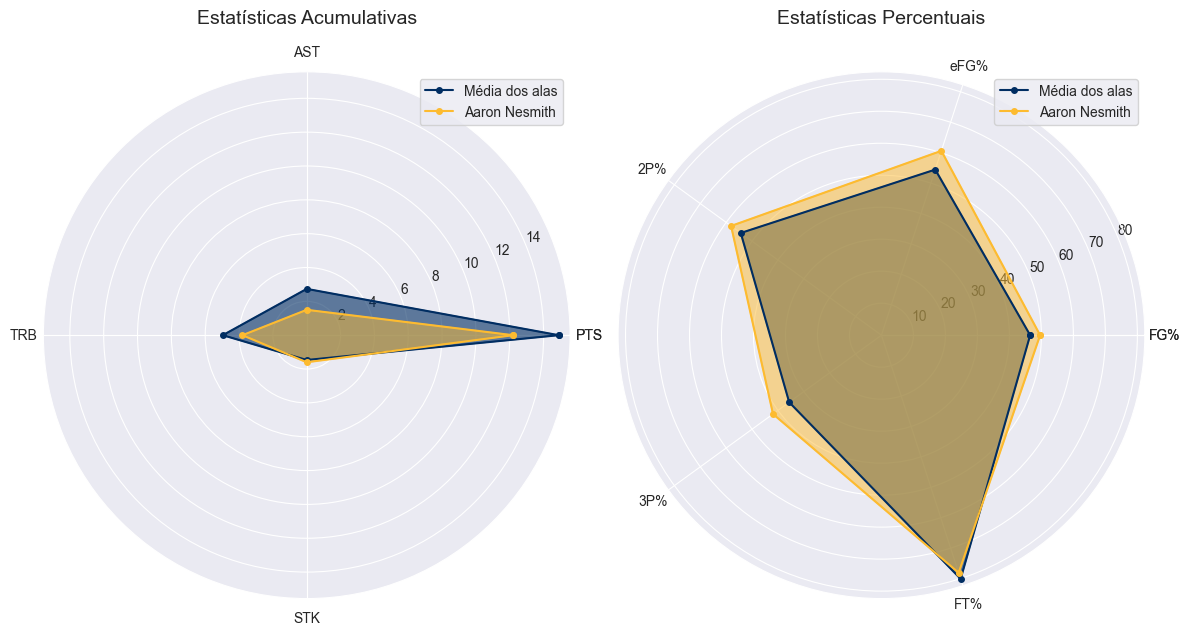

In [33]:
fig = plot_radar_charts(
    subjects_1, subjects_2,
    mean_stats_by_pos["SF"][:4], mean_stats_by_pos["SF"][4:], 
    player_stats["Aaron Nesmith"][:4], player_stats["Aaron Nesmith"][4:], 
    "Média dos alas", "Aaron Nesmith", 
)

Nas estatísticas básicas, Aaron Nesmith apresenta uma pontuação ligeiramente abaixo da média dos alas, consequência do seu volume de arremessos não tão alto. Sua participação em rebotes e assistências é preocupante, ambas significativamente abaixo da média da sua posição entre os titulares da liga. No lado defensivo, Nesmith possui média de tocos e roubos levemente acima da média, mostrando-se um defensor decente. Quando olhamos para a eficiência de arremessos, Nesmith exibe seu maior diferencial. Entre os titulares do Indiana Pacers, Nesmith é o que possui o maior eFG% com mais de 60%, além de ser eficiente em todos os tipos de arremessos. Sua incrível porcentagem de mais de 40% em arremessos de 3 pontos, torna-o uma ameaça letal do perímetro, e aliado com sua defesa sólida o qualifica como um ótimo 3&D. Com isso, fica evidente que Nesmith é um ala valioso, casando perfeitamente com o sistema ofensivo e aproveitando-se da crição de jogadas dos demais jogadores. Com pequenas evoluções, como mais agressividade em direção a cesta e um maior envolvimente nos rebotes, ele pode se transformar em um ala ainda mais completo.

<h2> <center> Conclusões

Principais insights:

<ul>
    <li> <strong> Ataque explosivo e coletivo:</strong> O Indiana possui discutivelmente o melhor ataque da NBA. Além de ser o 1° em pontos e assistências, os dados indicam que o sistema ofensivo de Indiana também é equilibrado e coletivo na finalização de jogadas </li>
    <li> <strong> Alta eficiência nos arremessos:</strong> O time apresenta ótimo rendimento nos arremessos de quadra, com destaque para a precisão da bola de 2 pontos </li>
    <li> <strong> Ótimas Aquisicões na offseason:</strong> As aquisiçãos de Obi Toppin e do importantíssimo Pascal Siakam, foram movimentos que elevaram o nível da equipe e que compensaram a saída dos bancários Bruce Brown e Buddy Hield, que foram utilizados como moeda de troca. Siakam foi o líder do time em pontos e rebotes, e um dos jogadores mais consistentes em toda a NBA. Já Obi Toppin foi um reserva que entrou em todos os jogos do time e entregou bons números para um bancário </li>
    <li> <strong> Tyrese Haliburton:</strong> O franchise player da equipe teve uma temporada de consolidação entre os melhores da sua posição. Com média de duplo-duplo, Haliburton aliou criatividade com eficiência, sendo talvez o principal responsável por reerguer a cultura vencedora no Indiana Pacers </li>
    <li> <strong> Myles Turner e Aaron Nesmith: </strong> ambos se destacam como opções defensivas sólidas, além de contribuírem ofensivamente, principalmente espaçando a quadra </li>
    <li> <strong> Banco participativo:</strong> a rotação dos Pacers é sólida e produtiva, com um banco que contribui ofensivamente e mantém o ritmo da equipe mesmo quando os titulares descansam. </li>
    <li> <strong> Dependência excessiva de Haliburton na criação de jogads:</strong> Apesar de seu talento e visão de jogo, o quinteto titular depende excessivamente de Haliburton para armar as jogadas. Essa centralização pode tornar a equipe vulnerável quando ele está mal ou ausente </li>
    <li> <strong> Defesa frágil:</strong> Embora possua bons números em tocos e roubos, a equipe de Indianápolis é dona de uma das piores defesas da NBA. Além de ser uma equipe que toma muitos pontos por jogo, também permite uma alta taxa de conversão de arremessos, tanto no garrafão, quanto no perímetro. Este é um ponto extremamente preocupante para um time que futuramente deve figurar frequentemente nos playoffs, onde defesas sólidas costumam se sobressair </li>
    <li> <strong> Deficiência em rebotes:</strong> Os rebotes são um dos maiores pontos críticos da equipe. O desempenho é pífio, principalmente em rebotes defensivos, onde possíveis adversários diretos em séries de playoffs, como o Boston Celtics e o New York Knicks, podem facilmente explorar</li>
    <li> <strong> Classe de rookies fraca:</strong> Dos três rookies da equipe, apenas Ben Sheppard teve minutos de jogo significativos, sendo o único a se consolidar na rotação do elenco, consequentemente também sendo o que demonstrou mais potencial de evolução. Jarace Walker teve poucos jogos e poucos minutos de média. Por último, Isaiah Wong participou de apenas um jogo da equipe.</li>
</ul>


Sugestões para melhoria de performance:

<ul>
    <li> Reforçar o garrafão com reboteiros </li>
        <ol>
            <li> Buscar pivôs ou ala-pivôs com bom histórico de rebotes (tanto via draft, quanto trocas) </li>
            <li> Trabalhar para que principalmente Myles Turner desenvolva este aspecto em seu jogo </li>
            <li> Estimular esforço do time inteiro nos rebotes - apenas Siakam está acima da média nessa métrica. </li>
        </ol>
    <li> Reestruturar a parte defensiva </li>
        <ol>
            <li> Implementar um esquema de ajuda defensiva mais estruturado, principalmente no garrafão </li>
            <li> Investir em bons defensores de perímetro, já que os adversários convertem um número considerável de arremessos de 3 pontos </li>
            <li> Reduzir a minutagem de jogadores com baixa entrega defensiva, em momentos chaves dos jogos </li>
        </ol>
    <li> Diversificar o playmaking </li>
        <ol>
            <li> Incentivar maior participação on-ball de Andrew Nembhard </li>
            <li> Utilizar rotações onde Tyrese Haliburton e T.J. McConnell atuam juntos </li>
        </ol>
    <li> Otimização ofensiva </li>
        <ol>
            <li> Continuar priorizando cestas de alta eficiência, como bandejas, pick and roll, etc. </li>
            <li> Aumentar o volume de arremessos de jogadores com alta eficiência, mas baixo volume, como Nembhard e Nesmith </li>
            <li> Obter um bom shooter de 3 pontos para suprir as saídas de Bruce Brown e Buddy Hield </li>
        </ol>
    <li> Desenvolvimento de rookies </li>
        <ol>
            <li> Dar mais minutos de jogo para Ben Sheppard em seu segundo ano </li>
            <li> Utilizar Jarace Walker em jogos menos importantes, para avaliar seu real potencial </li>
            <li> Continuar utilizando Isaiah Wong no time da G-League </li>
        </ol>
</ul>